# Capítulo 2. Distribuições de Dados e Amostras

## 2.0 Imports

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import wquantiles
import random

import matplotlib.pylab as plt
import matplotlib
from matplotlib import gridspec

import scipy
from scipy.stats import trim_mean
from scipy import stats
from scipy.stats import bootstrap
from statsmodels import robust
from sklearn.utils import resample

from IPython.display import Image
from IPython.core.display import HTML


In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

### 0.1 Helper functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [30, 15]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [4]:
jupyter_settings()

In [5]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rc('axes' ,labelsize=18)

## 2.1 Amostragem Aleatória

### População e Amostra

In [6]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

Um equívoco comum é pensar que a era do big data significa o fim da necessidade de amostragem. 

Na verdade, a proliferação de dados de qualidade e relevâncias variáveis reforça a necessidade da amostragem como ferramenta para trabalhar eficientemente com uma variedade de dados e para **minimizar o viés**. 

Mesmo em um projeto de big data, os modelos preditivos são tipicamente desenvolvidos e conduzidos com amostras, que são usadas também em testes de diversos tipos (por exemplo, precificação, web treatments).

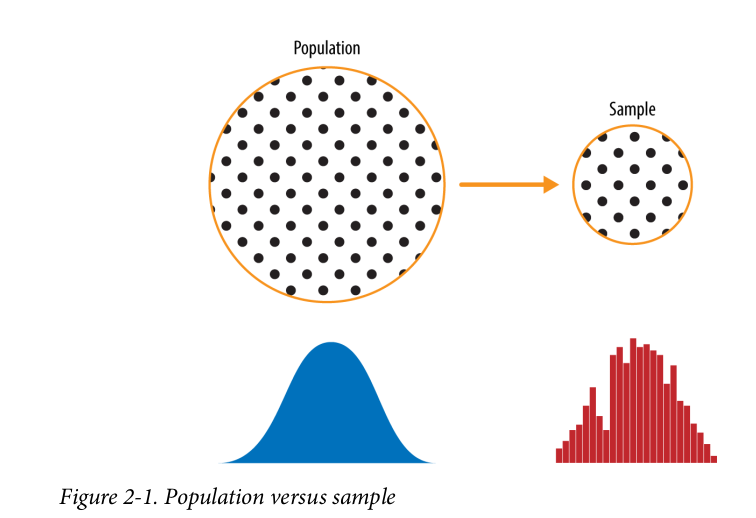

In [7]:
Image("/home/deivison/Documentos/projetos/stats/imagem/cap_02_pop_sample.png")

A Figura 2-1 mostra um esquema que sustenta os conceitos que discutiremos neste capítulo – **dados e distribuições de amostragem**.

O lado esquerdo representa uma **população** que, em estatística, se supõe seguir uma **distribuição** subjacente, mas **desconhecida**. 

Tudo o que está disponível são os dados da **amostra** e sua **distribuição empírica**, mostrados no lado direito.

Para ir do lado esquerdo para o lado direito, é utilizado um **procedimento de amostragem** (representado por uma seta).

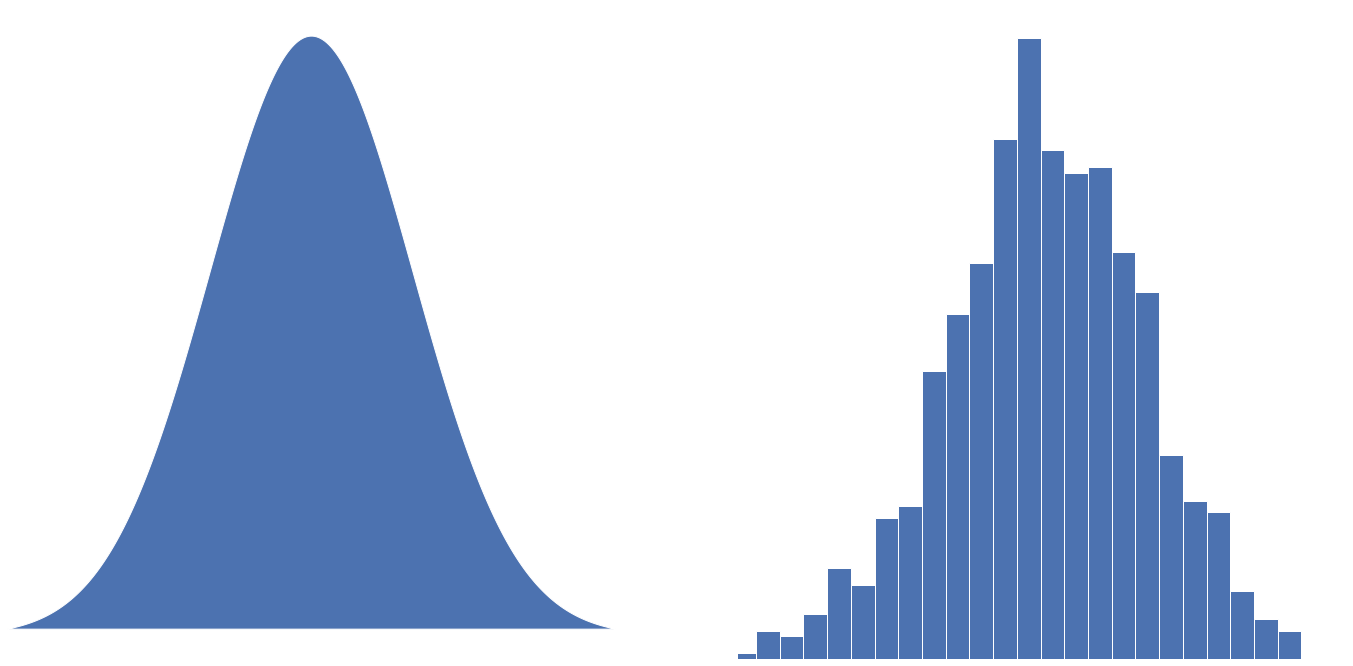

In [8]:
# como criar uma população e uma amostra aleatória que seguem a distribuição normal
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(24, 12))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

Em geral, os cientistas de dados não precisam se preocupar com a natureza teórica do lado esquerdo e, em vez disso, devem se **concentrar nos procedimentos de amostragem e nos dados disponíveis**.  

Existem algumas exceções notáveis.  

Às vezes, os dados são gerados a partir de um processo físico que pode ser modelado. 

O exemplo mais simples é jogar uma moeda: isso segue uma distribuição binomial. 
Qualquer situação binomial da vida real (compre ou não compre, fraude ou não, clique ou não clique) pode ser modelada efetivamente por uma moeda (com probabilidade modificada de cair cara, é claro).

Nesses casos, podemos obter informações adicionais usando nossa compreensão da população.

### Termos-chave para amostragem aleatória

**Amostra**
* Um subconjunto de um conjunto de dados maior.

**População**
* O maior conjunto de dados ou ideia de um conjunto de dados.

**N (n)**
* N --> O tamanho da população.
* n --> O tamanho da amostra.

**Amostragem aleatória**
* Elementos aleatoriamente obtidos para uma amostra.

**Amostragem estratificada**
* Divisão da população em estratos e faz amostragens aleatória em cada estrato.

**Estrato (pl., estratos)**
* Um subgrupo homogêneo de uma população com características comuns.

**Amostra aleatória simples**
* A amostra que resulta de amostragem aleatória sem estratificar a população.

**Viés**
* Erro sistemático.

**Viés de amostra**
* Uma amostra que não representa a população.

### Amostragem aleatória

<font color=blue>**_Amostragem aleatória_** </font>é um processo no qual **cada membro** disponível da população sendo amostrada tem **chances iguais** de ser escolhido para a amostra em cada extração. 

* A amostra resultante é chamada de amostra aleatória simples. 

A amostragem pode ser feita:

* **com reposição**, na qual as observações são devolvidas à população depois de cada extração, para que tenham a possibilidade de ser escolhidas novamente. 

* **sem reposição**, na qual, uma vez que as observações sejam selecionadas, ficam indisponíveis para futuras extrações. 

<font color=red>**A qualidade dos dados costuma ser mais importante do que sua quantidade ao fazer uma estimativa ou um modelo com base em uma amostra.** </font>

* A qualidade dos dados em ciência de dados envolve:
    * integralidade
    * consistência de formato
    * pureza
    * precisão de dados pontuais individuais. 

A estatística inclui a noção de representatividade.

### Seleção Aleatória

É um dos métodos estatísticos para atingir representatividade de uma amostra.

<font color = red>**Definição adequada de uma população acessível é a chave.**</font>

Exemplo perfil de um cliente:

* Primeiro: definir quem é o cliente alvo dentro de um estudo
    * Clientes antigos ou novos 
    * Clientes em potencial
    * Clientes são usuários ou revendedores
    * Clientes de um segmento x
* Segundo: especificar um procedimento de amostragem.
    * Aspectos temporais ( dia, hora, mês, final de semana) 
    * frequencia de compra
    * Aspectos geográficos
    * Aspectos sociais
* Se necessário dividir a população em stratos para garantir a representatividade correta.



### Tamanho versus Qualidade: Quando o tamanho importa?

<font color = blue>**Na era do big data, muitas vezes é surpreendente que menos seja mais.**</font>

O tempo e o esforço gastos em amostragens aleatórias não apenas reduzem o viés, mas também permitem maior atenção à exploração de dados e qualidade de dados. 

Por exemplo, dados faltantes e outliers podem contar informações úteis. 

* Pode ser extremamente caro rastrear os valores faltantes ou avaliar os outliers em milhões de registros, mas fazer isso em uma amostra de diversos milhares de registros pode ser viável. 

* A plotagem de dados e a inspeção manual são prejudicadas se houver dados em excesso.

**Então, quando quantidades massivas de dados são de fato necessárias?**

O cenário clássico para o valor do big data é quando os dados não são apenas grandes, mas também esparsos.

Considere as solicitações de pesquisa recebidas pelo Google. 

* O objetivo é determinar o melhor destino previsto para a pesquisa de determinada consulta.

* O valor real da tecnologia moderna de pesquisa é a habilidade de retornar resultados detalhados e úteis para uma enorme variedade de consultas, inclusive aquelas que ocorrem com uma frequência, digamos, de uma em um milhão.

<font color=red>**Mesmo na era do big data, a amostragem aleatória continua sendo uma flecha importante na aljava do cientista de dados.**</font>

• O viés ocorre quando as medições ou observações estão **sistematicamente** erradas porque não são representativas de toda a população.

• A qualidade dos dados é muitas vezes mais importante do que a quantidade de dados, e a amostragem aleatória pode reduzir o viés e facilitar a melhoria da qualidade que, de outra forma, seria proibitivamente cara.

## 2.2 Viés

### Viés da Amostra

Viés de Autosseleção de Amostragem

As **resenhas** de restaurantes, hotéis, cafés e afins que você lê em mídias sociais, como Yelp, **tendem ao viés**, porque as pessoas que escrevem ali **não são selecionadas aleatoriamente**. 

Em vez disso, elas mesmas tomam a iniciativa de escrever. 

Isso leva ao viés de autosseleção — as pessoas motivadas a escrever resenhas podem ser aquelas que:

* tiveram más experiências
* podem ter algum tipo de relação com o estabelecimento
* podem simplesmente ser um tipo de pessoa diferente daquelas que não escrevem resenhas. 

Observe que, **mesmo que** as amostras autosselecionadas possam ser indicadores **não confiáveis** da situação real, elas **podem ser mais confiáveis para a simples comparação** de um estabelecimento com outro semelhante a ele. 

* O mesmo viés de autosseleção pode se aplicar a cada um.

### Viés Estatístico

O <font color=blue>**viés estatístico**</font> refere-se a **erros** de medição ou amostragem que são **sistemáticos** e produzidos pelo **processo** de medição ou amostragem. 

Uma distinção importante deve ser feita entre erros devidos ao <font color=red>**acaso**</font> e erros devidos a <font color=green>**viés**</font>.

Considere o processo físico de uma arma atirando em um alvo. 

* Não atingirá o centro absoluto do alvo todas as vezes, nem mesmo muito.

* Um processo imparcial produzirá erro, mas é aleatório e não tende fortemente em nenhuma direção. 

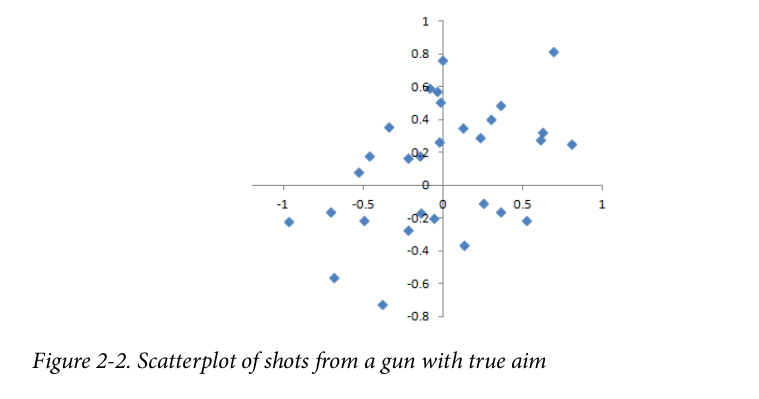

In [9]:
Image("/home/deivison/Documentos/projetos/stats/imagem/cap_02_scatterplot.png")

Os resultados mostrados na Figura 2-3 mostram um processo tendencioso - ainda há erro aleatório na direção x e y, mas também há um viés. 

* Os tiros tendem a cair no quadrante superior direito.

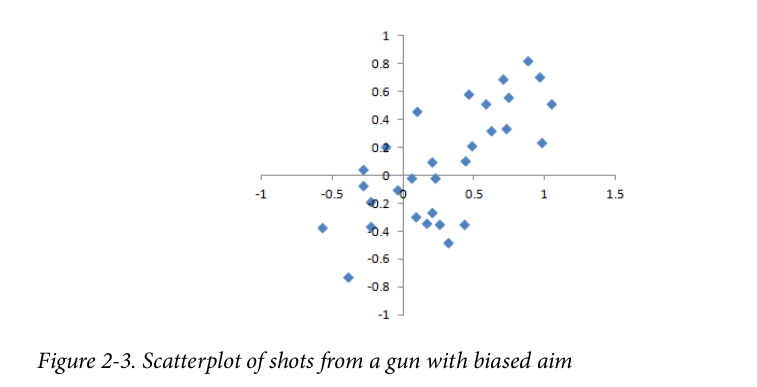

In [10]:
Image("/home/deivison/Documentos/projetos/stats/imagem/cap_02_scatterplot_02.png")

<font color = red>**Dados na vida real tem um viés:**</font>
* Roupas de uma cor vendem mais que outra.
* Comportamento é inerente ao fenômeno vendas.  

<font color = green>**Erro do modelo:**</font>
* Não pode ser enviesado
* Necessário ser normalmente distribuído

### Viés de seleção

O viés de seleção se refere à prática de **escolher os dados de forma seletiva** — conscientemente ou inconscientemente —, de modo que isso leva a uma **conclusão que é enganosa ou efêmera.** 

<font color=red>**Já que a revisão repetitiva de grandes conjuntos de dados é uma premissa de valor-chave em ciência de dados, o viés de seleção é algo com o que se preocupar.**</font> 

Uma forma de <font color = blue>**viés de seleção de especial**</font> preocupação para os cientistas de dados é o que John Elder (fundador da Elder Research, uma respeitada consultoria de pesquisa de dados) chama de <font color = blue>**efeito de busca vasta.**</font> 

* Se você aplica modelos e faz perguntas diferentes repetitivamente com um grande conjunto de dados, está sujeito a encontrar algo interessante. 

* O resultado que você encontrou é realmente interessante, ou é talvez um outlier?
* Podemos nos proteger disso usando um conjunto de controle, e às vezes até mais de um, contra o qual validar o desempenho. 
* Elder também defende o uso daquilo que ele chama de <font color=blue>**embaralhamento de alvos (um teste de permutação, basicamente)**</font> para testar a validade de associações preditivas que o modelo de pesquisa de dados sugere.

**As formas de viés de seleção em estatísticas típicas, além do efeito de busca vasta, incluem:**
* amostragem não aleatória
* dados selecionados a dedo
* seleção de intervalos de tempo que acentuam um efeito estatístico específico
* parar um experimento quando os resultados parecem “interessantes”.

### Regressão a média

Regressão à média se refere a um fenômeno envolvendo sucessivas medições em dada variável: observações extremas tendem a ser seguidas pelas mais centrais. 
* Conferir foco e significado especiais a valores extremos pode levar a uma forma de viés de seleção.

* **A regressão à média é uma consequência de uma forma específica de viés de seleção.**
* O fenômeno foi observado primeiro por Francis Galton, em 1886, que escreveu a respeito conexão com tendências genéticas.
    * Por exemplo, os filhos de homens extremamente altos tendem a não ser tão altos quanto seus pais
    
Regressão à média, no sentido de “retornar”, é diferente do método de modelagem estatística de regressão linear, no qual uma relação linear é estimada entre variáveis preditoras e uma variável resultante.

### Ideias Chaves

* Especificar uma hipótese e então coletar dados seguindo **princípios de aleatorização e amostragem aleatória** protege os dados contra viés.
* Todas as outras formas de análise de dados correm o risco de viés resultante do processo de coleta/análise de dados:
    * aplicação repetitiva de modelos em pesquisa de dados 
    * bisbilhotagem de dados em pesquisas
    * **seleção pós-fato** de eventos interessantes

## 2.3 Distribuição de Amostragem de uma Estatística

O termo <font color = blue>**distribuição de amostragem de uma estatística**</font> se refere à distribuição de alguma amostra estatística **dentre muitas amostras extraídas de uma mesma população**. 

* Boa parte das estatísticas clássicas se preocupa em fazer inferências de amostras (pequenas) para populações (muito grandes).

### Termos chaves

**Estatística amostral**
* Uma métrica calculada para uma amostra de dados extraída de uma população maior.
    * média da amostra
    * mediana da amostra
    * desvio padrão da amostra

**Distribuição de dados**
* A distribuição de frequências de valores específicos em um conjunto de dados.

**Distribuição amostral**
* A distribuição de frequências de uma amostra estatística sobre **muitas** amostras ou reamostras.

**Teorema central  de limite**
* A tendência da distribuição amostral de assumir uma forma normal conforme o tamanho da amostra cresce.

**Erro-padrão**
* A variabilidade (desvio-padrão) de uma estatística amostral sobre muitas amostras 
* <font color = red> **não deve ser confundido com desvio-padrão, o qual, por si mesmo, se refere à variabilidade de valores de dados individuais.**</font>

### Amostra

**Geralmente, uma amostra é extraída com o intuito de :**

* medir uma estatística amostral
* modelar um modelo estatístico ou de aprendizado de máquina 

**Como nossa estimativa ou modelo se baseia em uma amostra:**
* Devido a aleatoriedade podemos cometer um erro devido a uma amostra específica. 
* Uma amostra diferente pode resultar em um resultado diferente.

* Estamos, portanto, interessados em quão diferente poderia ser
* <font color = red>**Uma preocupação-chave é a variabilidade amostral.**</font>

**Se tivéssemos muitos dados:**

* Poderíamos extrair amostras adicionais e observar diretamentea distribuição de uma estatística amostral. 

* Normalmente calculamos nossa estimativa ou modelo usando a maior quantidade de dados que estiver facilmente disponível

* Então a opção de extrair amostras adicionais de uma população não está disponível.

### Exemplo Rendimentos Anuais de Candidatos a Empréstimo

<font color = blue>**A distribuição de uma estatística amostral como a média costuma ser mais
regular e campanular do que a distribuição dos próprios dados.**</font> 

Quanto maior a amostra em que a estatística se baseia, mais isso é verdade. 

Além disso, **quanto maior** a amostra, **mais estreita é a distribuição** da estatística amostral.

This is illustrated in an example using annual income for loan applicants to Lending Club (see “A Small Example: Predicting Loan Default” on page 239 for a description of the data)

In [11]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)
loans_income.head(10)

0     67000
1     52000
2    100000
3     78762
4     37041
5     33000
6     38500
7     85000
8    120000
9     57000
Name: x, dtype: int64

In [12]:
#tamanho do dataset --> 50 mil valores
loans_income.shape

(50000,)

#### Amostra 1 - mil elementos retirados aleatoriamente dos 50 mil valores

In [13]:
# amostra aleatoria com mil elementos dos 50 mil
sample_data = pd.DataFrame({'income': loans_income.sample(1000),'type': 'Data', })

In [14]:
sample_data.head()

,income,type
40292,63000,Data
38959,92000,Data
17361,134000,Data
33996,52000,Data
26491,43000,Data


In [15]:
sample_data.shape

(1000, 2)

In [16]:
# Calculo da media
sample_data['income'].mean()

70513.233

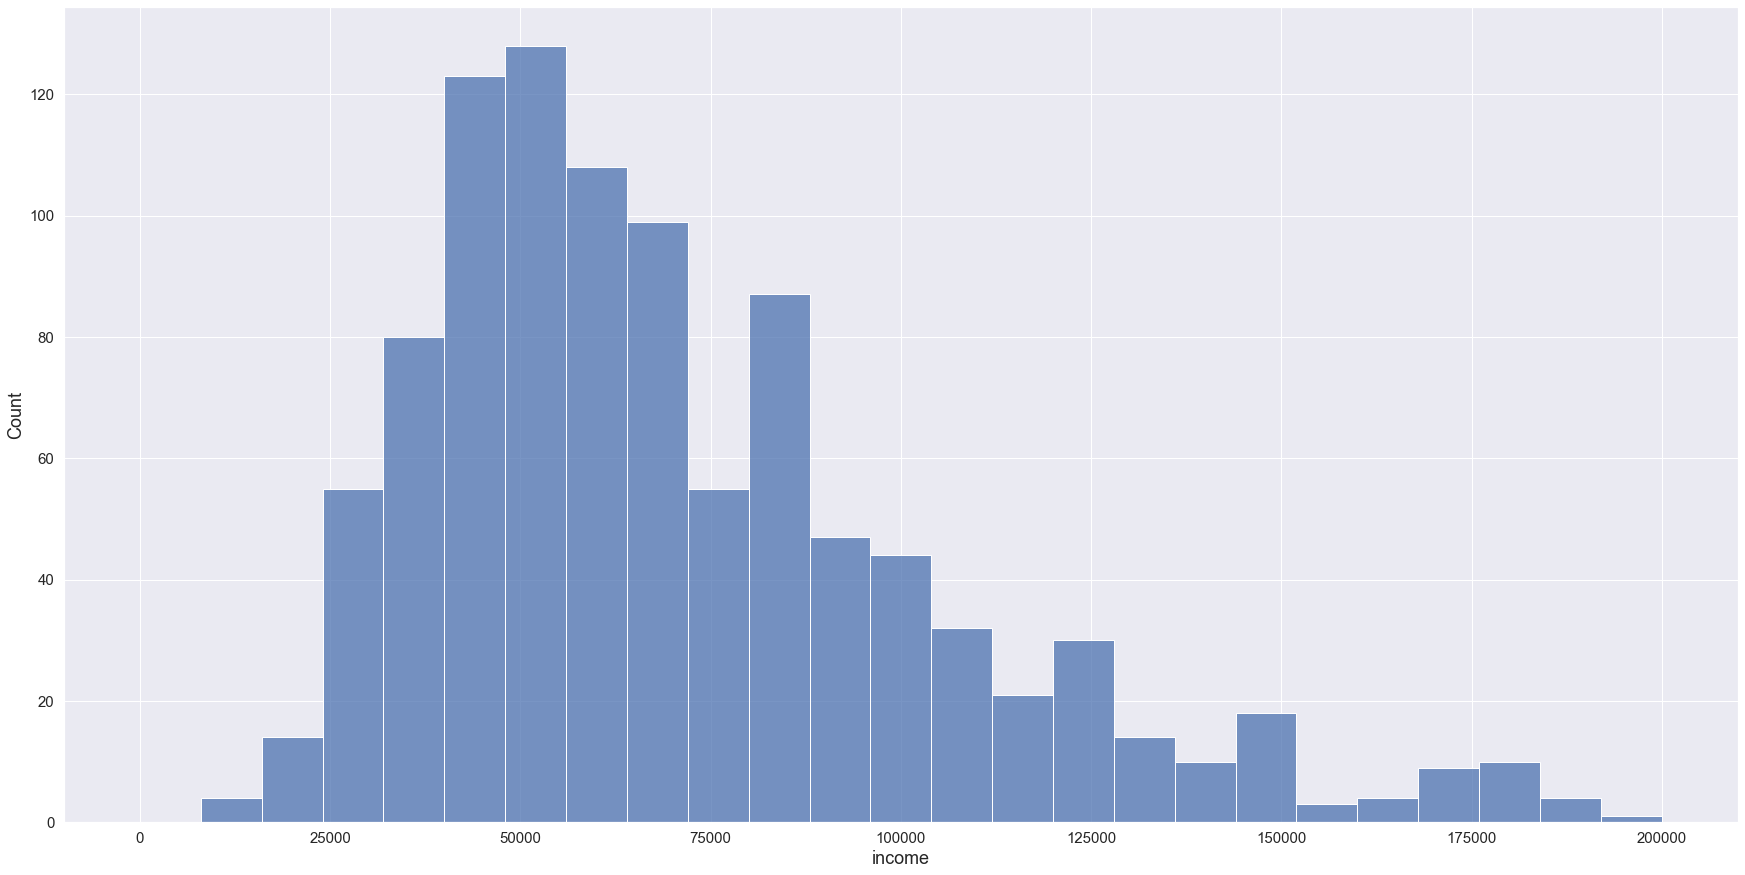

In [17]:
# histograma
sns.histplot( x = 'income', data = sample_data, bins = 25, binrange = (0,200000) );

#### Amostra 2 - Mil médias de cinco valores retirados aleatoriamente dos 50 mil valores

In [18]:
#Mil medias de 5 valores aleatórios dos 50 mil
sample_mean_05 = pd.DataFrame({'income': [loans_income.sample(5).mean() for _ in range(1000)],
                               'type': 'Mean of 5',})

In [19]:
sample_mean_05.head()

,income,type
0,83700.0,Mean of 5
1,56200.0,Mean of 5
2,45000.0,Mean of 5
3,73000.0,Mean of 5
4,65200.0,Mean of 5


In [20]:
sample_mean_05.shape

(1000, 2)

In [21]:
# media das médias das 1000 amostras com 5 elementos
sample_mean_05['income'].mean()

68840.9078

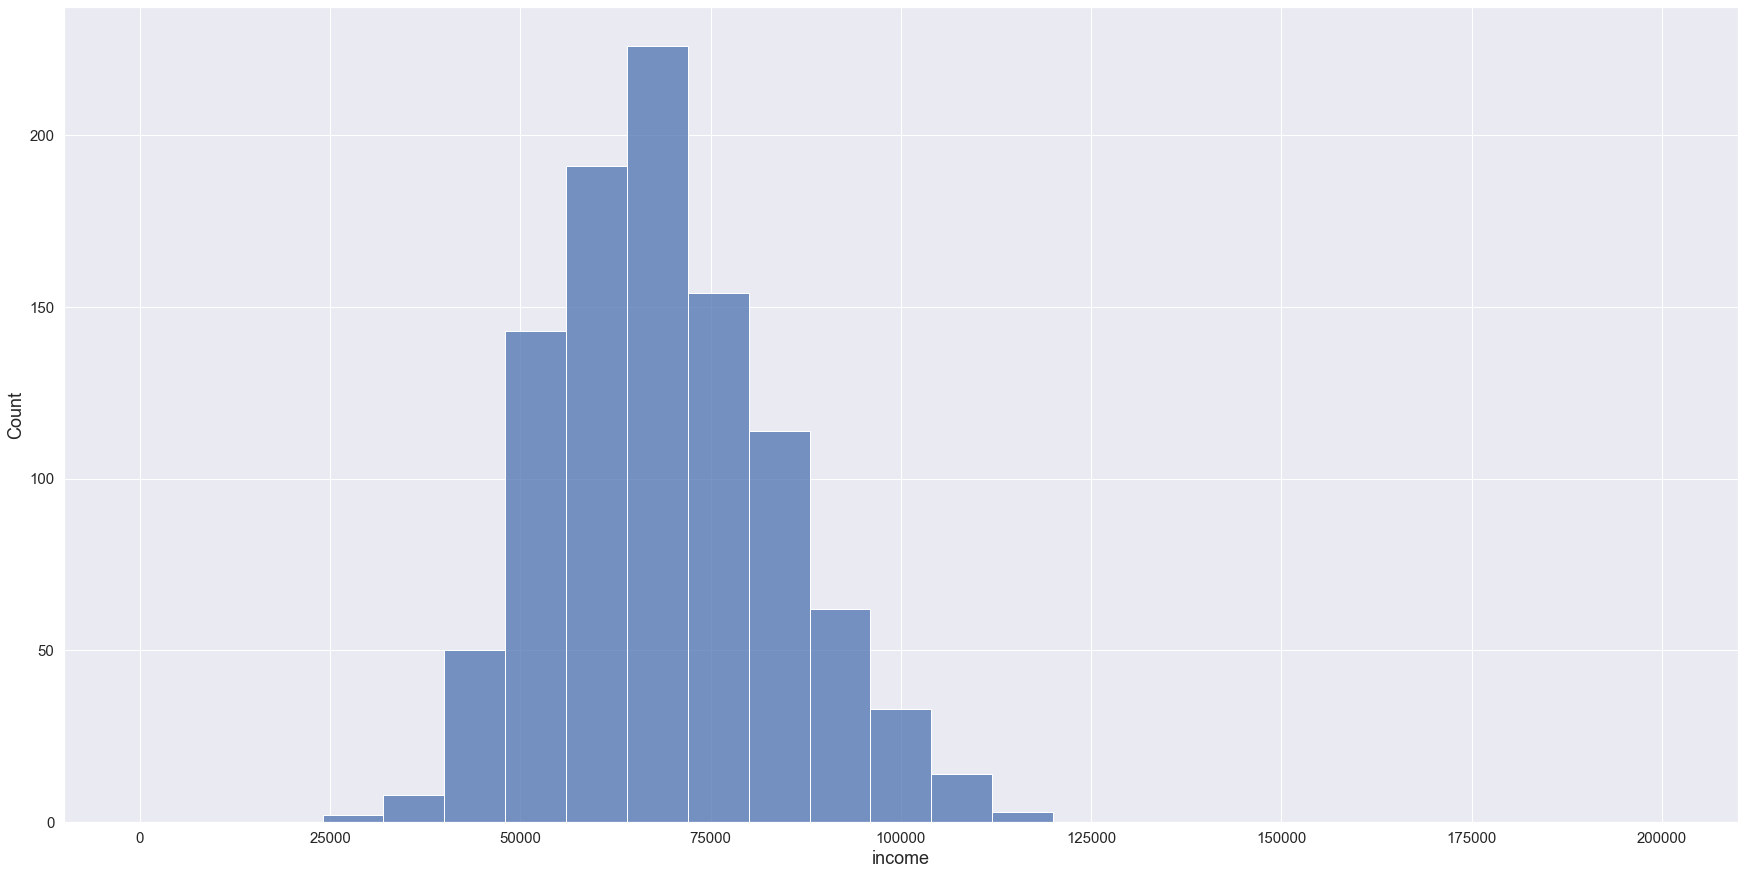

In [22]:
# histograma
sns.histplot( x = 'income', data = sample_mean_05, bins = 25, binrange = (0,200000) );

#### Amostra 3 - Mil médias de vinte valores retirados aleatoriamente dos 50 mil valores

In [23]:
sample_mean_20 = pd.DataFrame({'income': [loans_income.sample(20).mean() for _ in range(1000)],
                               'type': 'Mean of 20',})

In [24]:
sample_mean_20.head()

,income,type
0,81372.55,Mean of 20
1,60432.05,Mean of 20
2,69336.60,Mean of 20
3,72635.50,Mean of 20
4,69729.80,Mean of 20


In [25]:
sample_mean_20.shape

(1000, 2)

In [26]:
# media das médias das 1000 amostras com 20 elementos
sample_mean_20['income'].mean()

68788.7336

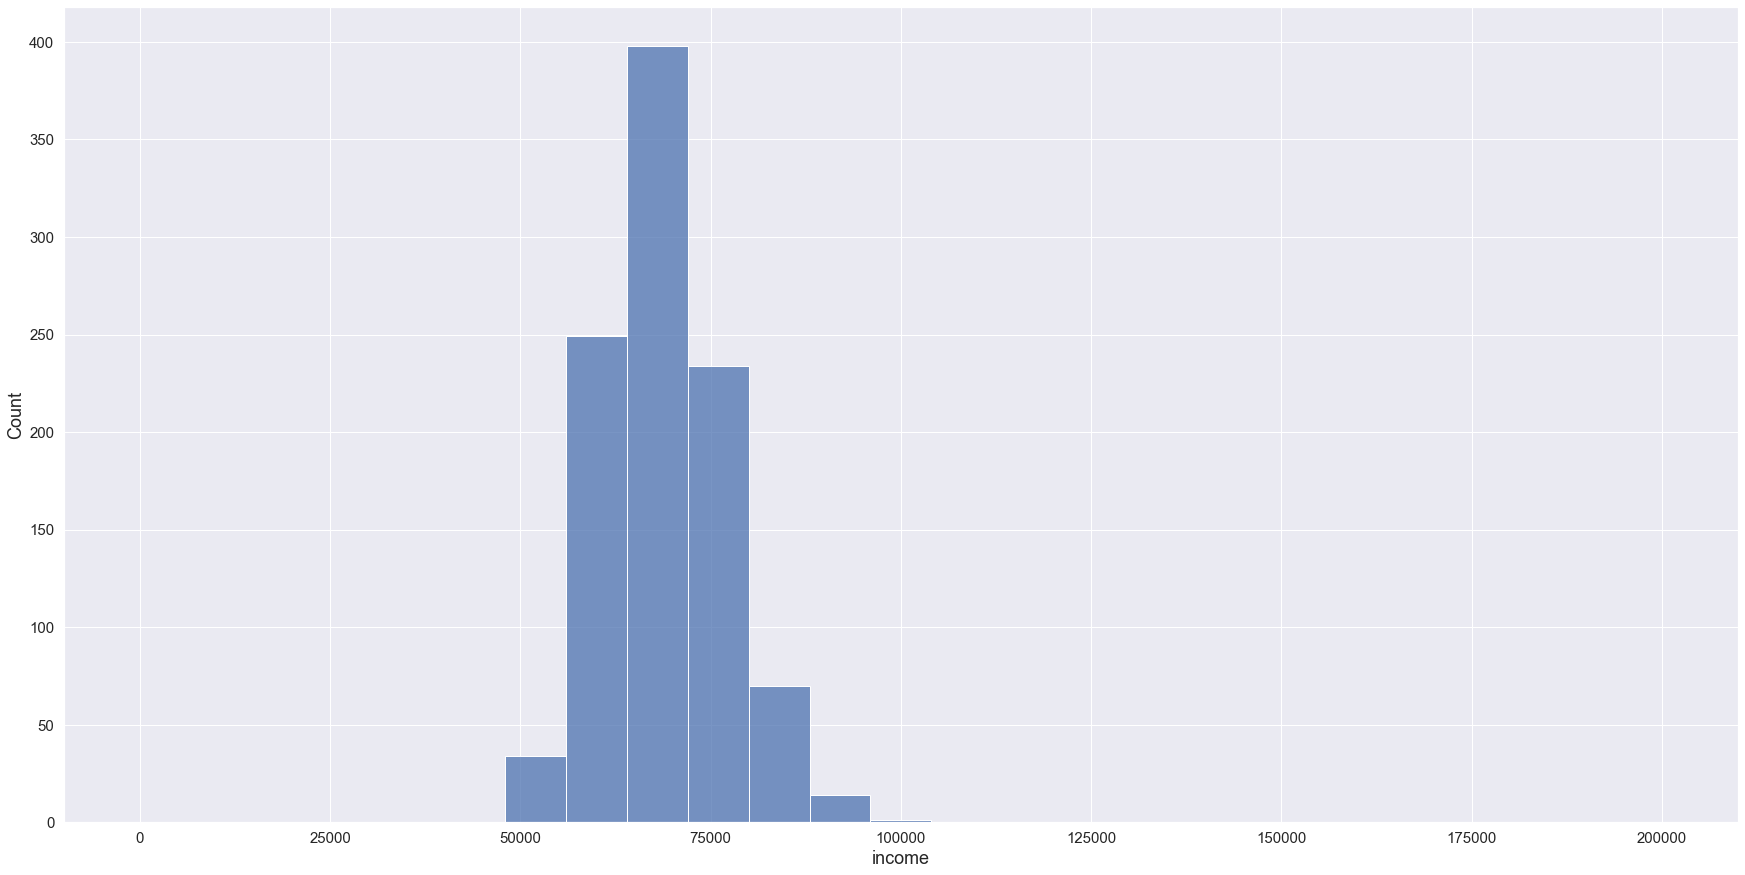

In [27]:
sns.histplot( x = 'income', data = sample_mean_20,bins = 25,  binrange = (0,200000) );

#### Juntando as 3 amostras no mesmo dataframe

In [28]:
## Juntando as amostras no mesmo dataset
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.sample(10)

,income,type
11256,110000.00,Data
45681,108000.00,Data
641,82608.00,Mean of 5
737,72853.70,Mean of 20
753,69600.00,Mean of 5
991,78700.45,Mean of 20
811,71400.00,Mean of 5
302,71071.15,Mean of 20
250,65200.00,Mean of 5
46589,60000.00,Data


In [29]:
#dataset com 3000 mil valores 
results.shape

(3000, 2)

In [30]:
aux1 = results[['income','type']].groupby('type').mean().reset_index()
aux1

,type,income
0,Data,70513.2330
1,Mean of 20,68788.7336
2,Mean of 5,68840.9078


In [31]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

# amostra com mil valores 
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

        income  type
1730   38000.0  Data
5166   50000.0  Data
37493  30000.0  Data
3626   17000.0  Data
46100  92400.0  Data


#### Plotando histogramas das distribuições das amostras

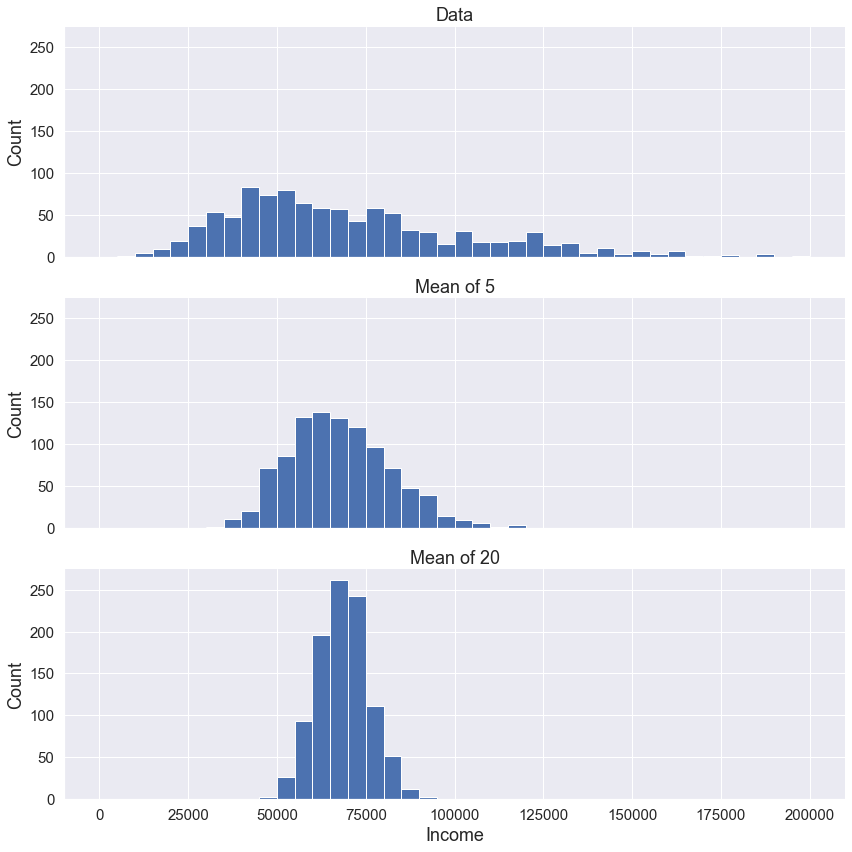

In [32]:
# sns.facegrid --> Multi-plot grid for plotting conditional relationships.

g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=4, aspect=3)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

O histograma dos valores individuais de dados é amplamente espalhado e inclinado a valores mais altos, como se espera em dados de rendimento.

Os histogramas da média de 5 e 20 são cada vez mais compactos e campanulares.

### Teorema Central de Limite

O fenômeno chamado de teorema central de limite informa que as **médias extraídas de múltiplas amostras** serão **semelhantes** à conhecida **curva normal** campanular, <font color=red>**mesmo se a população fonte não for normalmente distribuída**</font>, já que o tamanho da amostra é grande o bastante e o desvio dos dados da normalidade não é muito grande. 

O teorema de limite central **permite fórmulas de aproximação normal:**

* Como a distribuição t, chi² e F
    * Usada no cálculo de distribuições de amostra para inferência
    * Construção de Intervalos de confiança e testes de hipótese.

O teorema de limite central **recebe muita atenção em textos de estatística tradicional**, pois fundamenta os mecanismos de testes de hipótese e intervalos de confiança, os quais, por si só, consomem metade do espaço de tais textos. 

<font color = red>**Cientistas de dados**</font> **devem estar cientes desse papel**, mas já que testes de hipótese formais e intervalos de confiança têm um pequeno papel na ciência de dados, e o <font color = blue>**bootstrap**</font> está disponível de qualquer forma, <font color = red>**o teorema de limite central não é tão central na prática da ciência de dados.**</font>

#### Distribuição Exponecial

In [33]:
# Simulação aleatória da distribuição

In [34]:
#lambda lb
lb = 2

#numero de amostras
n = 3

for i in range( 0, n ):
    x = np.random.exponential( lb, n)
    print('Amostra', i, ':' , x )

Amostra 0 : [1.63695832 0.9932375  0.81818241]
Amostra 1 : [0.84972927 0.9630432  0.61274861]
Amostra 2 : [0.07101848 2.28260186 0.58747217]


In [35]:
# Calcular valor das médias dos lambdas das 10 amostras

In [36]:
vn = []
vmean = []

#lambda lb
lb = 2

for n in np.arange( 1, 100, 10):    # amostra1= 1 elementos -> amostra 2 = 11 elementos -> amostra3 = 21 elementos
    X = np.random.exponential( lb, n) # X é gerado de uma distribuicao exponencial
    vmean.append( np.mean(X) )        # Calcula a media amostral e armazena 
    vn.append(n)                      # 

print('\nNúmero de amostras: {}'.format( len(vn) ) )

print('\nQuantidade de elementos de cada amostra\n')
print(vn)

print('\nMédia do lambda de cada amostra\n')
print(vmean)


Número de amostras: 10

Quantidade de elementos de cada amostra

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]

Média do lambda de cada amostra

[0.18472651548912322, 1.722380466949825, 1.8349532533603716, 2.044374056964177, 1.7923080651990795, 1.8575807439326288, 1.880487580040918, 1.8108966564309892, 1.7784586095165424, 1.826510901707709]


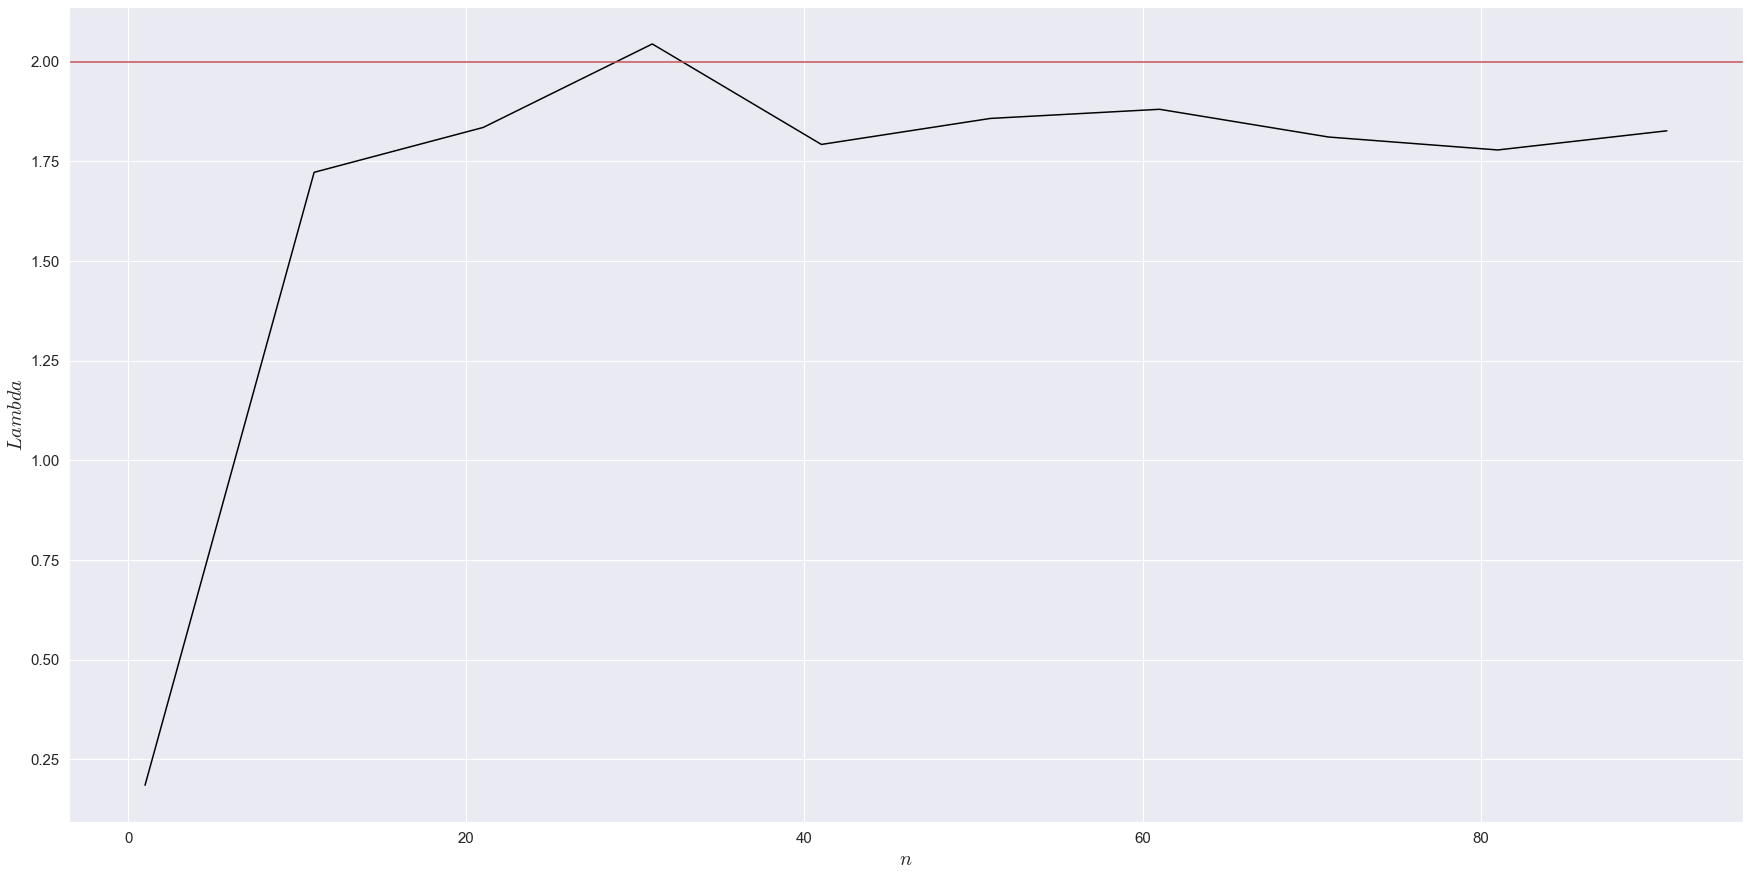

In [37]:
# grafico media dos lambdas das 10 amostras
plt.plot( vn, vmean, '-', color = 'black' )
plt.axhline( y = lb, color = 'r', linestyle = '-' )
plt.xlabel( r'$n$', fontsize = 20 )
plt.ylabel(r'$Lambda$', fontsize = 20 )
plt.show(True)

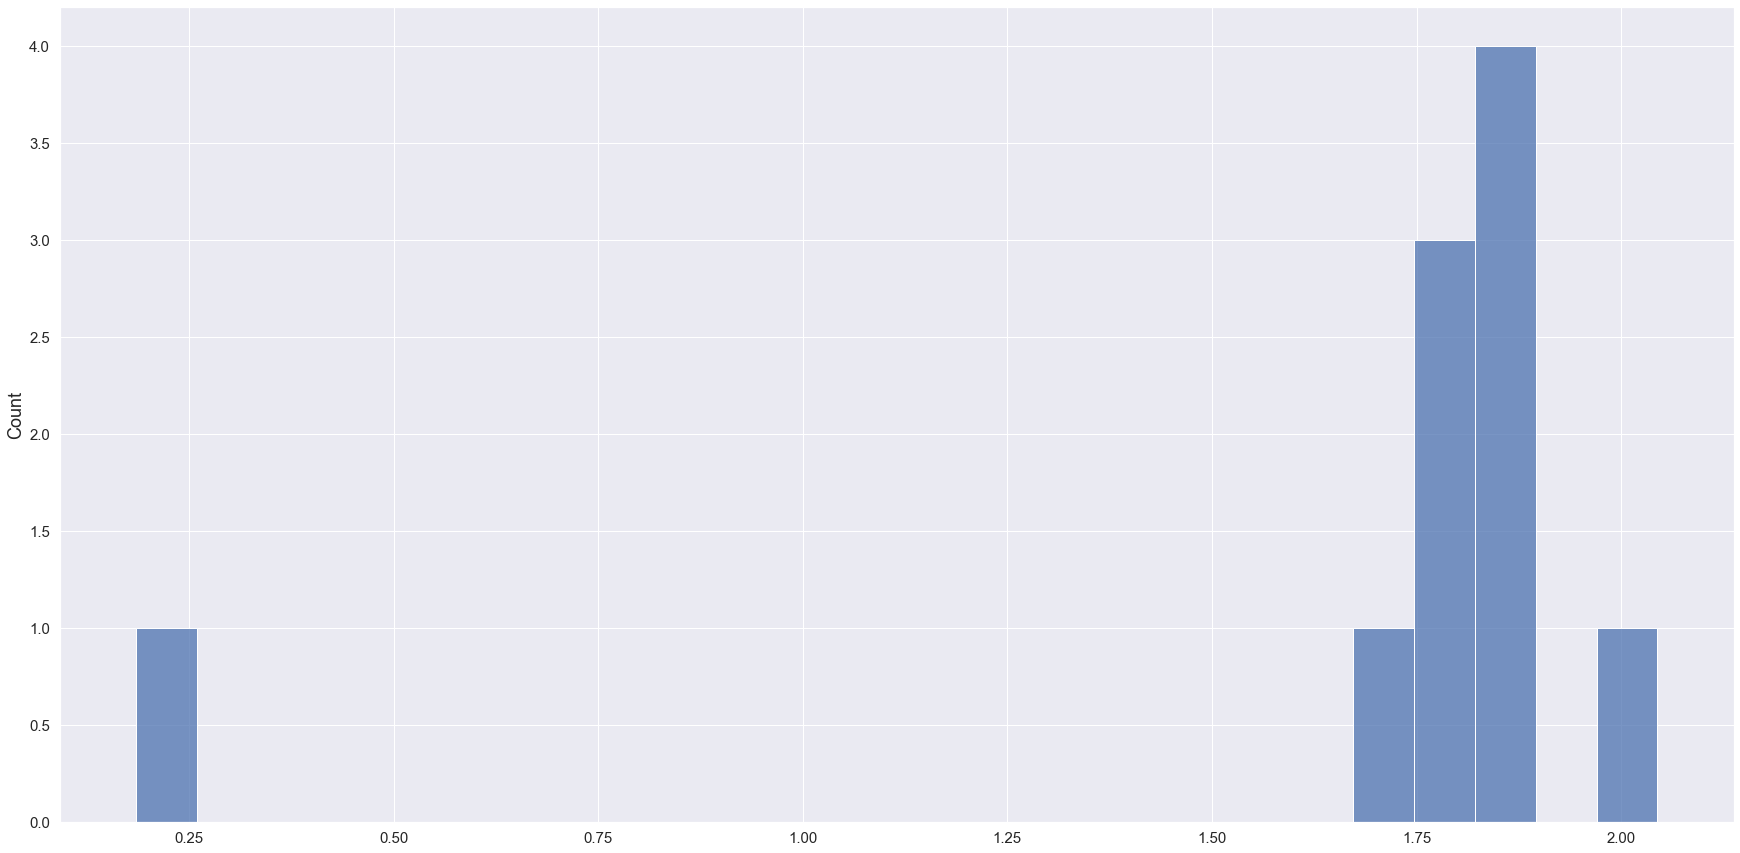

In [38]:
sns.histplot(data = vmean, bins = 25);

In [39]:
# Calcular valor das médias dos lambdas das 100 amostras

In [40]:
vn = []
vmean = []

#lambda lb
lb = 2

for n in np.arange( 1, 1000, 10):    # amostra1= 1 elementos -> amostra 2 = 11 elementos -> amostra3 = 21 elementos
    X = np.random.exponential( lb, n) # X é gerado de uma distribuicao exponencial
    vmean.append( np.mean(X) )        # Calcula a media amostral e armazena 
    vn.append(n)                      # 

print('\nNúmero de amostras: {}'.format( len(vn) ) )

print('\nQuantidade de elementos de cada amostra\n')
print(vn)

print('\nMédia do lambda de cada amostra\n')
print(vmean)


Número de amostras: 100

Quantidade de elementos de cada amostra

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381, 391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511, 521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641, 651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771, 781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901, 911, 921, 931, 941, 951, 961, 971, 981, 991]

Média do lambda de cada amostra

[0.7224104754142531, 2.2185451846625495, 2.403973412354673, 1.7307620454788188, 2.1291576492502857, 1.5532353211214902, 2.1090345831271984, 2.067240828395335, 1.7449379817918775, 1.9181030987904482, 2.0287100822797965, 2.090627398000846, 2.047302860689329, 2.0221934361259413, 1.8935953822465832, 2.272541983216216, 2.001460343823166, 2.081458069520503, 2.0299372840230463, 2.111242760023482, 2.11712924930581

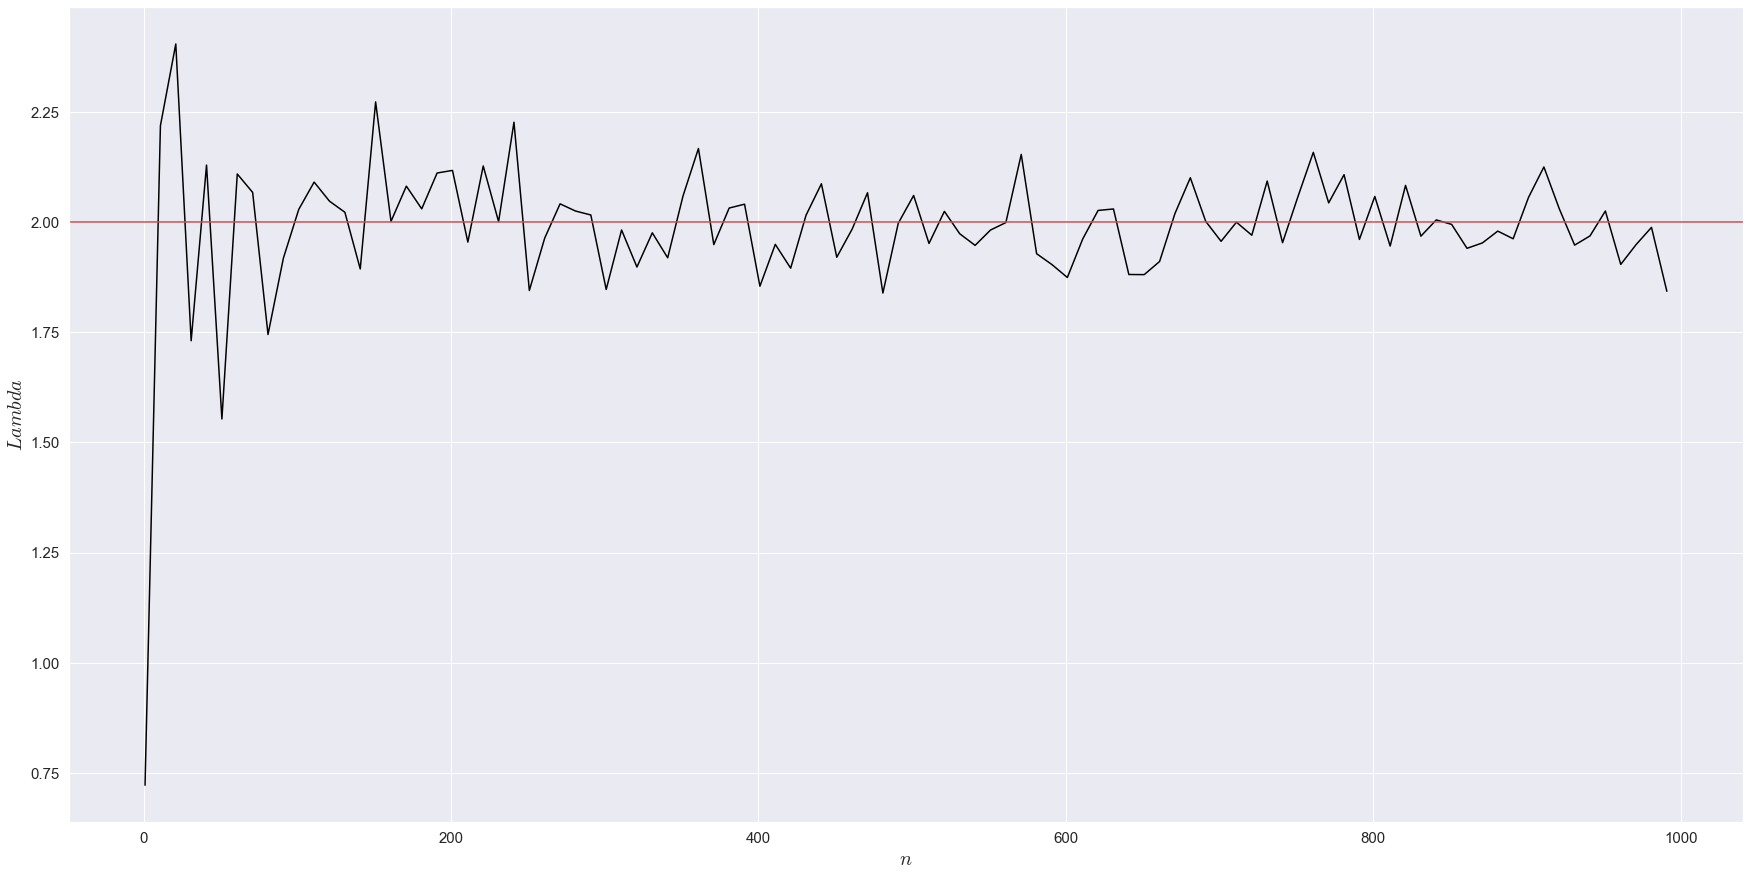

In [41]:
# grafico media dos lambdas das 100 amostras
plt.plot( vn, vmean, '-', color = 'black' )
plt.axhline( y = lb, color = 'r', linestyle = '-' )
plt.xlabel( r'$n$', fontsize = 20 )
plt.ylabel(r'$Lambda$', fontsize = 20 )
plt.show(True)

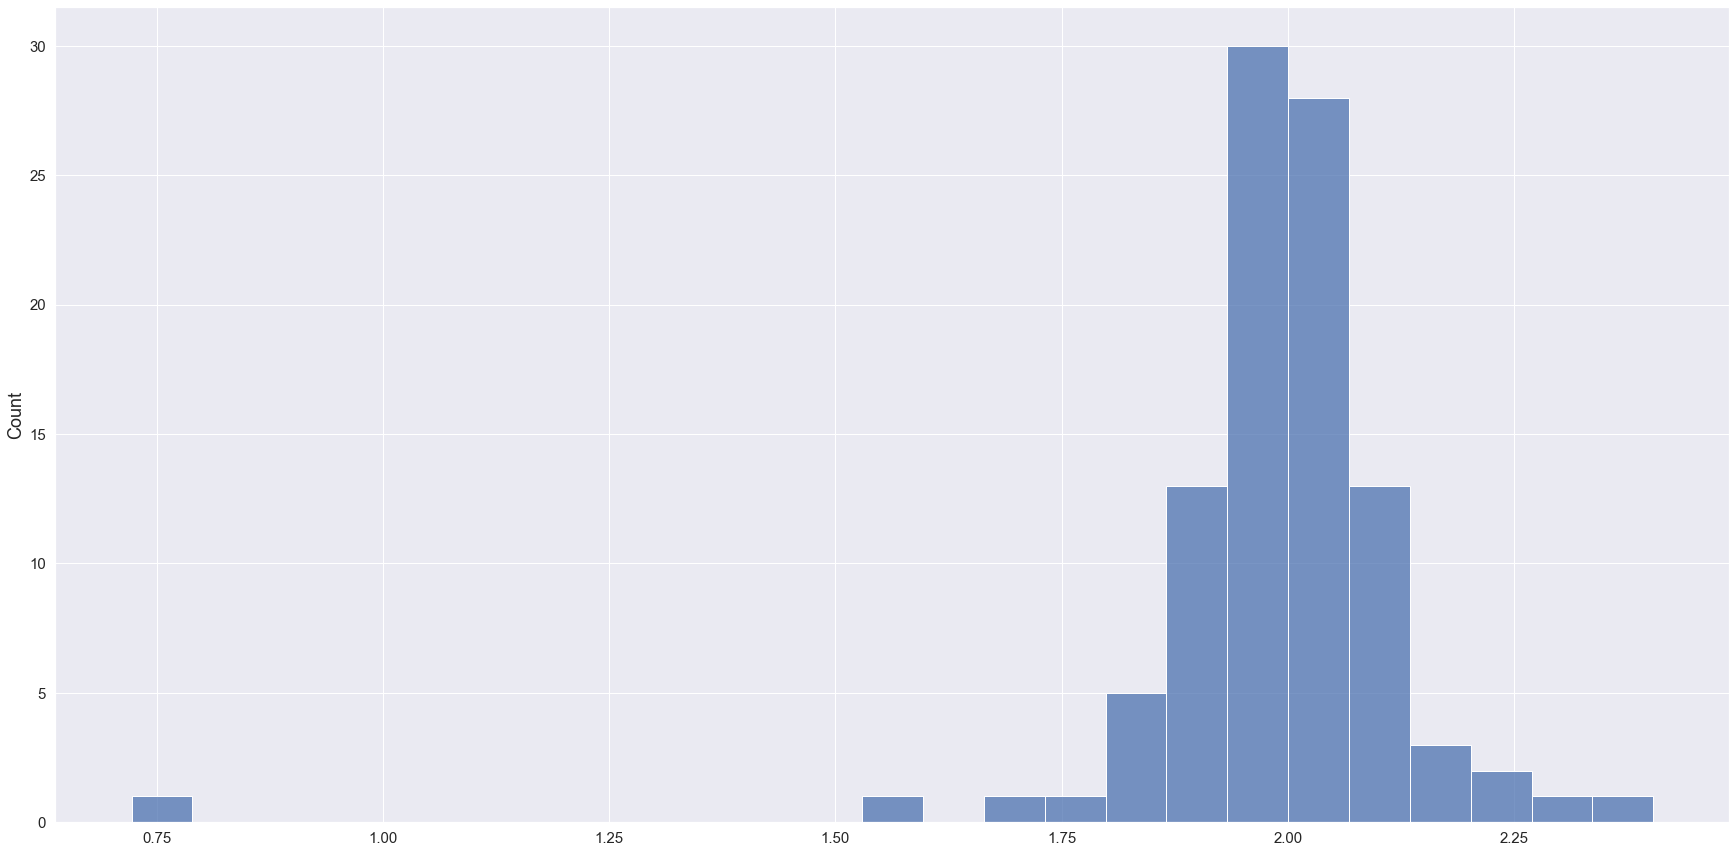

In [42]:
sns.histplot(data = vmean, bins = 25);

In [43]:
# calcular valor das médias dos lambdas das 1000 amostras

In [44]:
vn = []
vmean = []

#lambda lb
lb = 2

for n in np.arange( 1, 10000, 10):    # amostra1= 1 elementos -> amostra 2 = 11 elementos -> amostra3 = 21 elementos
    X = np.random.exponential( lb, n) # X é gerado de uma distribuicao exponencial
    vmean.append( np.mean(X) )        # Calcula a media amostral e armazena 
    vn.append(n)                      # 

print('\nNúmero de amostras: {}'.format( len(vn) ) )


Número de amostras: 1000


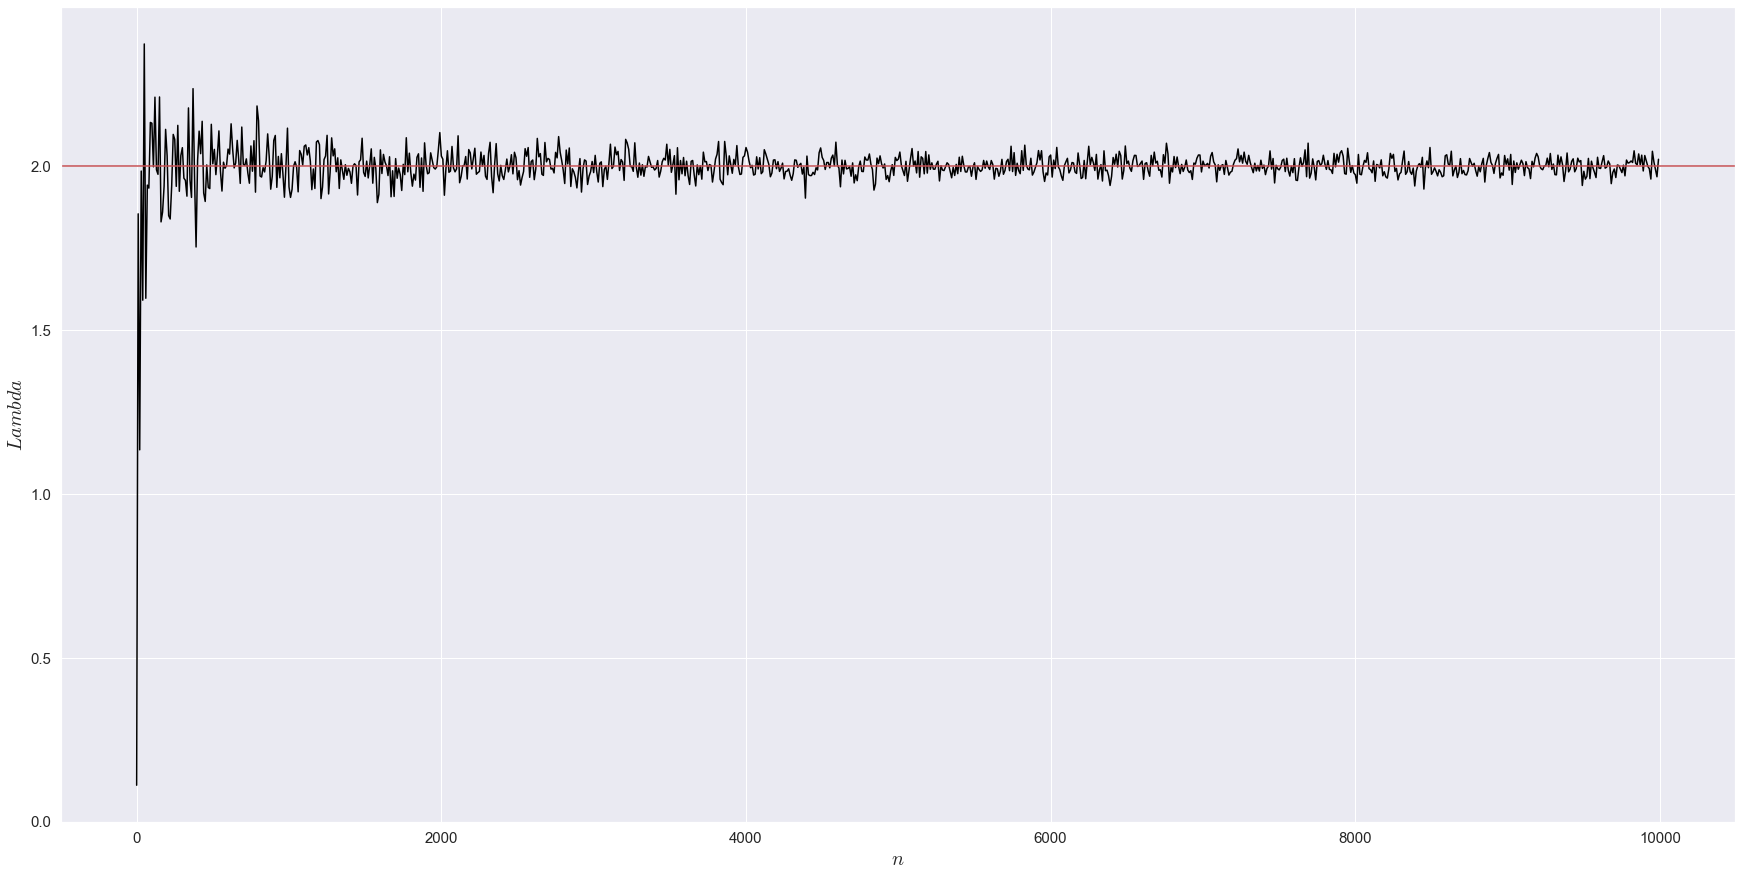

In [45]:
# grafico media dos lambdas das 1000 amostras
plt.plot( vn, vmean, '-', color = 'black' )
plt.axhline( y = lb, color = 'r', linestyle = '-' )
plt.xlabel( r'$n$', fontsize = 20 )
plt.ylabel(r'$Lambda$', fontsize = 20 )
plt.show(True)

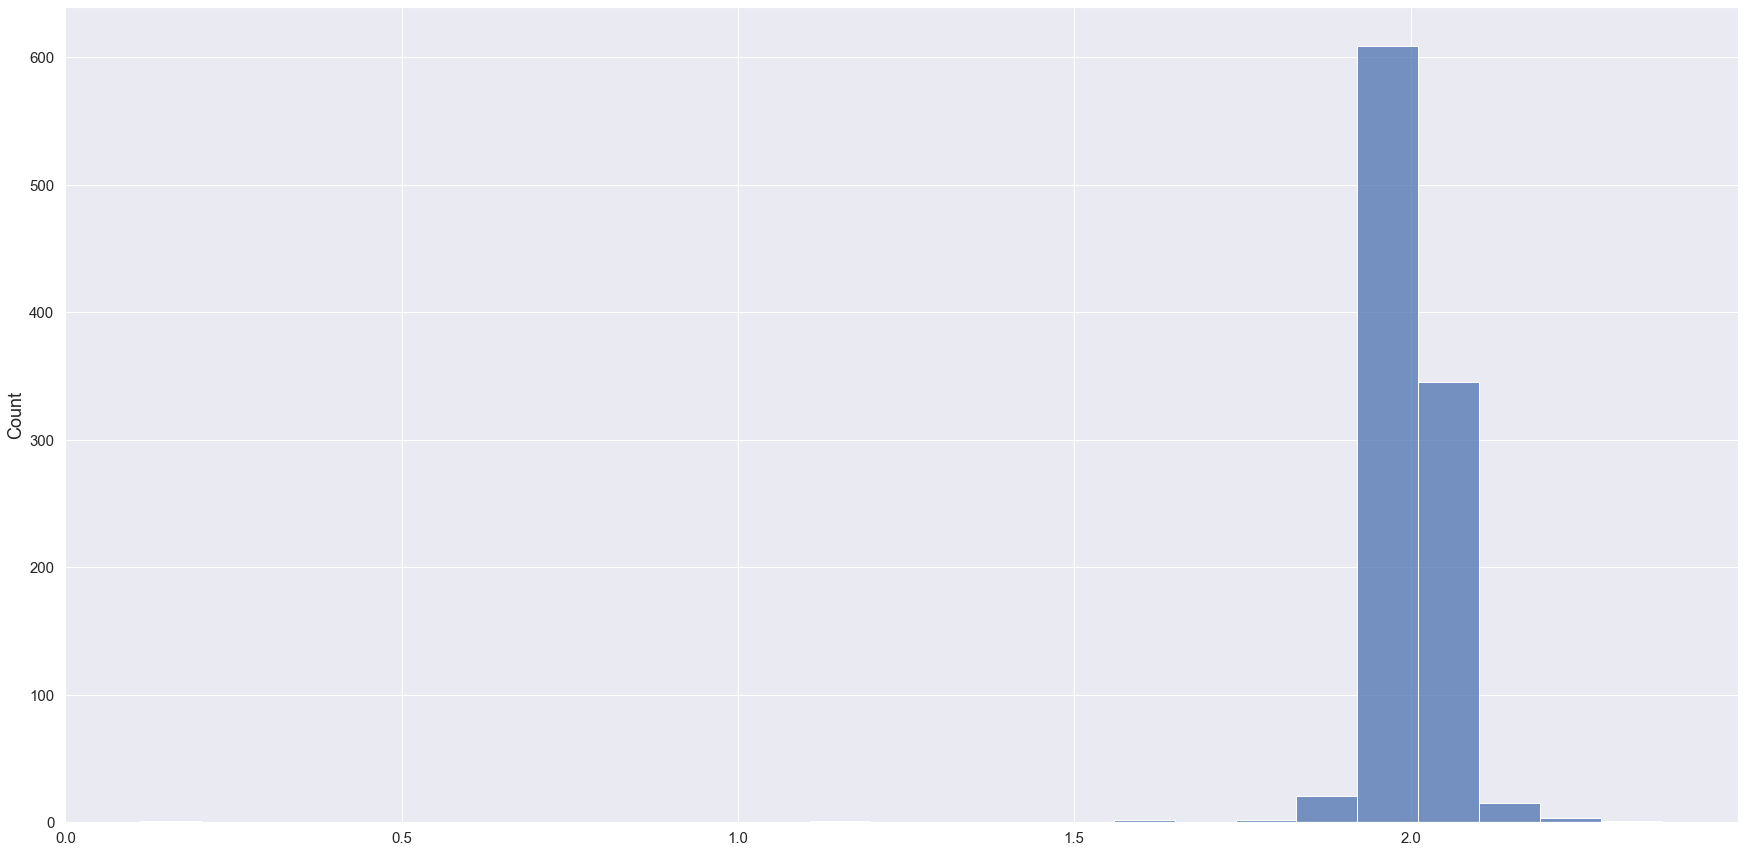

In [46]:
sns.histplot(data = vmean, bins = 25);

### Erro padrão 

O <font color = blue>**erro-padrão**</font> é uma métrica única que **resume a variabilidade na distribuição de amostragem** para uma estatística. 

**Ele pode ser estimado utilizando uma estatística baseada:**
* no desvio-padrão s dos valores da amostra 
* no tamanho de amostra n

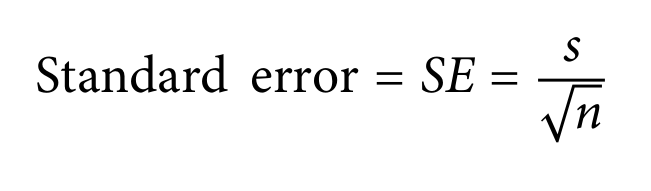

In [47]:
Image("/home/deivison/Documentos/projetos/stats/imagem/cap_02_erro_padrao_1.png")

**Conforme o tamanho da amostra cresce, o erro-padrão diminui:**

* O relacionamento entre o erro-padrão e o tamanho da amostra às vezes é chamado de **regra da raiz quadrada de n:** 
    * A fim de reduzir o erro-padrão em um fator de 2, o tamanho da amostra deve ser aumentado em um fator de 4.

**Considere a abordagem a seguir para medir o erro-padrão:**
1. Colete um número de amostras novas de uma população.
2. Para cada nova amostra, calcule a estatística (por exemplo, a média).
3. Calcule o desvio-padrão da estatística calculada no Passo 2 e use-o como sua estimativa de erro-padrão.

#### Amostras fixas -  variando o número de elementos da amostra (n)

##### 3 Amostras -- n =  5

In [48]:
#gera uma amostra com 10  numeros aleatorio de uma população dos numeros de 1 a 100
res = [ random.randrange(1, 100, 1) for i in range(5) ]
res

[7, 86, 13, 39, 11]

<font color = red>**1. Calcule o número de amostras de um população**</font>

In [49]:
aux1 = {'amostra1': [ random.randrange(1, 100, 1) for i in range(5) ] , 
        'amostra2': [ random.randrange(1, 100, 1) for i in range(5) ], 
        'amostra3': [ random.randrange(1, 100, 1) for i in range(5) ] }

amostras_05 = pd.DataFrame(aux1)
amostras_05

,amostra1,amostra2,amostra3
0,47,57,59
1,94,96,93
2,8,49,46
3,86,38,92
4,15,74,45


<font color = red>**2. Para cada amostra calcule a média (estatística)**</font>

In [50]:
media_amostra1 = amostras_05['amostra1'].mean()
media_amostra2 = amostras_05['amostra2'].mean()
media_amostra3 = amostras_05['amostra3'].mean()

print('media_amostra1:',media_amostra1)
print('media_amostra2:',media_amostra2)
print('media_amostra3:',media_amostra3)

media_amostra1: 50.0
media_amostra2: 62.8
media_amostra3: 67.0


In [51]:
# medida de tendencia central das médias das 3 amostras
medias_amostras = {'resultado': [media_amostra1, media_amostra2, media_amostra3] }
media_1 = np.mean( medias_amostras['resultado'] )
media_1

59.93333333333334

<font color = red>**3. Calcule o desvio padrão das médias (estatística) calculadas no passo 2 e use na fórmula do erro padrão**</font>

In [52]:
desvio_1 = np.std(medias_amostras['resultado'])
desvio_1

7.230183646046313

In [53]:
erro_padrao_1 = desvio_1 / np.sqrt(5) 
erro_padrao_1

3.2334364244733664

##### 3 Amostras -- n =  20

<font color = red>**1. Calcule o número de amostras de uma população**</font>

In [54]:
aux1 = {'amostra1': [ random.randrange(1, 100, 1) for i in range(20) ] , 
        'amostra2': [ random.randrange(1, 100, 1) for i in range(20) ], 
        'amostra3': [ random.randrange(1, 100, 1) for i in range(20) ] }

amostras_20 = pd.DataFrame(aux1)
amostras_20

,amostra1,amostra2,amostra3
0,37,59,89
1,74,55,76
2,36,16,68
3,13,77,47
4,48,99,26
5,54,46,59
6,71,20,51
7,65,14,70
8,10,13,41
9,90,40,2


<font color = red>**2. Para cada amostra calcule a média (estatística)**</font>

In [55]:
media_amostra1 = amostras_20['amostra1'].mean()
media_amostra2 = amostras_20['amostra2'].mean()
media_amostra3 = amostras_20['amostra3'].mean()

print('media_amostra1:',media_amostra1)
print('media_amostra2:',media_amostra2)
print('media_amostra3:',media_amostra3)

media_amostra1: 44.65
media_amostra2: 44.0
media_amostra3: 64.7


In [56]:
medias_amostras = {'resultado': [media_amostra1, media_amostra2, media_amostra3] }
media_2 = np.mean( medias_amostras['resultado'] )
media_2

51.116666666666674

<font color = red>**3. Calcule o desvio padrão das médias (estatística) calculadas no passo 2 e use na fórmula do erro padrão**</font>

In [57]:
desvio_2 = np.std(medias_amostras['resultado'])
desvio_2

9.608532088143793

In [58]:
erro_padrao_2 = desvio_2 / np.sqrt(20) 
erro_padrao_2

2.148533091307752

In [59]:
print('3 amostras com n = 5')
print('--> Média das médias = {} \n--> Desvio padrão = {} \n--> Erro padrão = {}'.format(media_1,desvio_1,erro_padrao_1))
print('\n3 amostras com n = 20')
print('--> Média das médias = {} \n--> Desvio padrão = {} \n--> Erro padrão = {}'.format(media_2,desvio_2,erro_padrao_2))

3 amostras com n = 5
--> Média das médias = 59.93333333333334 
--> Desvio padrão = 7.230183646046313 
--> Erro padrão = 3.2334364244733664

3 amostras com n = 20
--> Média das médias = 51.116666666666674 
--> Desvio padrão = 9.608532088143793 
--> Erro padrão = 2.148533091307752


<font color = red >**Conforme o tamanho da amostra cresce, o erro-padrão diminui:**</font>

* Amostras com n = 20 ( **4** x 5  )

* **O relacionamento entre o erro-padrão e o tamanho da amostra:**
    * regra da raiz quadrada de n ( denominador da fórmula do Erro padrão) 
    * A fim de reduzir o erro-padrão em um fator de 2, o tamanho da amostra deve ser aumentado em um fator de 4.

#### Amostras Variando -  Número de elementos da amostra (n) fixo

##### 5 Amostras -- n =  25

<font color = red>**1. Calcule o número de amostras de uma população**</font>

In [60]:
aux1 = {'amostra1': [ random.randrange(1, 100, 1) for i in range(25) ] , 
        'amostra2': [ random.randrange(1, 100, 1) for i in range(25) ], 
        'amostra3': [ random.randrange(1, 100, 1) for i in range(25) ], 
        'amostra4': [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra5': [ random.randrange(1, 100, 1) for i in range(25) ]}

amostras_05 = pd.DataFrame(aux1)
amostras_05

,amostra1,amostra2,amostra3,amostra4,amostra5
0,37,40,25,47,13
1,9,81,65,98,55
2,48,16,23,80,43
3,6,27,23,43,15
4,17,45,56,78,72
5,61,27,33,36,57
6,2,52,54,71,34
7,76,13,48,45,25
8,67,46,71,47,25
9,92,96,27,34,45


<font color = red>**2. Para cada amostra calcule a média (estatística)**</font>

In [61]:
media_amostra1 = amostras_05['amostra1'].mean()
media_amostra2 = amostras_05['amostra2'].mean()
media_amostra3 = amostras_05['amostra3'].mean()
media_amostra4 = amostras_05['amostra4'].mean()
media_amostra5 = amostras_05['amostra5'].mean()

print('media_amostra1:',media_amostra1)
print('media_amostra2:',media_amostra2)
print('media_amostra3:',media_amostra3)
print('media_amostra4:',media_amostra4)
print('media_amostra5:',media_amostra5)

media_amostra1: 41.92
media_amostra2: 46.88
media_amostra3: 44.68
media_amostra4: 53.4
media_amostra5: 41.4


In [62]:
medias_amostras_1 = {'resultado': [media_amostra1, media_amostra2, media_amostra3,media_amostra4,media_amostra5] }
media_1 = np.mean( medias_amostras_1['resultado'] )
media_1

45.656000000000006

<font color = red>**3. Calcule o desvio padrão das médias (estatística) calculadas no passo 2 e use na fórmula do erro padrão**</font>

In [63]:
desvio_1 = np.std(medias_amostras_1['resultado'])
desvio_1

4.347217960949278

In [64]:
erro_padrao_1 = desvio_1 / np.sqrt(25) 
erro_padrao_1

0.8694435921898556

#####  20 Amostras -- n =  25

<font color = red>**1. Calcule o número de amostras de uma população**</font>

In [65]:
aux1 = {'amostra1':  [ random.randrange(1, 100, 1) for i in range(25) ], 
        'amostra2':  [ random.randrange(1, 100, 1) for i in range(25) ], 
        'amostra3':  [ random.randrange(1, 100, 1) for i in range(25) ], 
        'amostra4':  [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra5':  [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra6':  [ random.randrange(1, 100, 1) for i in range(25) ], 
        'amostra7':  [ random.randrange(1, 100, 1) for i in range(25) ], 
        'amostra8':  [ random.randrange(1, 100, 1) for i in range(25) ], 
        'amostra9':  [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra10': [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra11': [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra12': [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra13': [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra14': [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra15': [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra16': [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra17': [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra18': [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra19': [ random.randrange(1, 100, 1) for i in range(25) ],
        'amostra20': [ random.randrange(1, 100, 1) for i in range(25) ] }

amostras_20 = pd.DataFrame(aux1)
amostras_20

,amostra1,amostra2,amostra3,amostra4,amostra5,amostra6,amostra7,amostra8,amostra9,amostra10,amostra11,amostra12,amostra13,amostra14,amostra15,amostra16,amostra17,amostra18,amostra19,amostra20
0,85,24,94,65,53,93,66,69,72,89,63,82,81,22,86,70,14,18,16,84
1,58,57,36,5,61,58,26,9,68,55,79,59,75,22,3,31,13,13,22,91
2,32,20,84,73,78,38,69,77,88,60,22,40,49,28,83,60,26,88,39,78
3,56,4,68,48,6,97,32,51,38,43,56,89,37,38,64,79,34,53,50,22
4,92,97,87,73,61,37,88,32,44,69,34,63,75,56,72,32,48,77,72,15
5,88,19,11,61,58,46,57,91,72,93,84,35,8,83,73,75,47,96,43,50
6,73,38,51,8,96,36,87,57,88,17,47,59,66,90,75,99,23,6,33,97
7,45,69,54,86,30,21,30,29,42,87,86,6,25,53,78,14,51,82,94,81
8,78,35,85,46,33,76,54,90,30,53,94,64,84,50,74,92,38,16,34,74
9,60,87,15,83,22,8,66,30,94,47,15,88,61,68,69,64,75,44,80,51


<font color = red>**2. Para cada amostra calcule a média (estatística)**</font>

In [66]:
media_amostra1  = amostras_20['amostra1'  ].mean()
media_amostra2  = amostras_20['amostra2'  ].mean()
media_amostra3  = amostras_20['amostra3'  ].mean()
media_amostra4  = amostras_20['amostra4'  ].mean()
media_amostra5  = amostras_20['amostra5'  ].mean()
media_amostra6  = amostras_20['amostra6'  ].mean()
media_amostra7  = amostras_20['amostra7'  ].mean()
media_amostra8  = amostras_20['amostra8'  ].mean()
media_amostra9  = amostras_20['amostra9'  ].mean()
media_amostra10 = amostras_20['amostra10' ].mean()
media_amostra11 = amostras_20['amostra11' ].mean()
media_amostra12 = amostras_20['amostra12' ].mean()
media_amostra13 = amostras_20['amostra13' ].mean()
media_amostra14 = amostras_20['amostra14' ].mean()
media_amostra15 = amostras_20['amostra15' ].mean()
media_amostra16 = amostras_20['amostra16' ].mean()
media_amostra17 = amostras_20['amostra17' ].mean()
media_amostra18 = amostras_20['amostra18' ].mean()
media_amostra19 = amostras_20['amostra19' ].mean()
media_amostra20 = amostras_20['amostra20' ].mean()
 
print('media_amostra 1:' ,media_amostra1  )
print('media_amostra 2:' ,media_amostra2  )
print('media_amostra 3:' ,media_amostra3  )
print('media_amostra 4:' ,media_amostra4  )
print('media_amostra 5:' ,media_amostra5  )
print('media_amostra 6:' ,media_amostra6  )
print('media_amostra 7:' ,media_amostra7  )
print('media_amostra 8:' ,media_amostra8  )
print('media_amostra 9:' ,media_amostra9  )
print('media_amostra10:' ,media_amostra10 )
print('media_amostra11:' ,media_amostra11 )
print('media_amostra12:' ,media_amostra12 )
print('media_amostra13:' ,media_amostra13 )
print('media_amostra14:' ,media_amostra14 )
print('media_amostra15:' ,media_amostra15 )
print('media_amostra16:' ,media_amostra16 )
print('media_amostra17:' ,media_amostra17 )
print('media_amostra18:' ,media_amostra18 )
print('media_amostra19:' ,media_amostra19 )
print('media_amostra20:' ,media_amostra20 )

media_amostra 1: 56.56
media_amostra 2: 45.2
media_amostra 3: 56.48
media_amostra 4: 42.56
media_amostra 5: 56.72
media_amostra 6: 49.76
media_amostra 7: 50.8
media_amostra 8: 50.48
media_amostra 9: 50.6
media_amostra10: 53.08
media_amostra11: 45.4
media_amostra12: 53.92
media_amostra13: 53.96
media_amostra14: 39.84
media_amostra15: 57.56
media_amostra16: 58.76
media_amostra17: 45.48
media_amostra18: 37.04
media_amostra19: 44.68
media_amostra20: 59.08


In [67]:
medias_amostras_2 = {'resultado': [media_amostra1,  media_amostra2,  media_amostra3,  media_amostra4,  media_amostra5,
                                 media_amostra6,  media_amostra7,  media_amostra8,  media_amostra9,  media_amostra10,
                                 media_amostra11, media_amostra12, media_amostra13, media_amostra14, media_amostra15,
                                 media_amostra16, media_amostra17, media_amostra18, media_amostra19, media_amostra20] }
media_2 = np.mean( medias_amostras_2['resultado'] )
media_2

50.398

<font color = red>**3. Calcule o desvio padrão das médias (estatística) calculadas no passo 2 e use na fórmula do erro padrão**</font>

In [68]:
desvio_2 = np.std(medias_amostras_2['resultado'])
desvio_2

6.342901228933019

In [69]:
erro_padrao_2 = desvio_2 / np.sqrt(25)
erro_padrao_2

1.2685802457866038

In [70]:
print('5 amostras com n = 25')
print('--> Média das médias = {} \n--> Desvio padrão = {} \n--> Erro padrão = {}'.format(media_1,desvio_1,erro_padrao_1))
print('\n20 amostras com n = 25')
print('--> Média das médias = {} \n--> Desvio padrão = {} \n--> Erro padrão = {}'.format(media_2,desvio_2,erro_padrao_2))

5 amostras com n = 25
--> Média das médias = 45.656000000000006 
--> Desvio padrão = 4.347217960949278 
--> Erro padrão = 0.8694435921898556

20 amostras com n = 25
--> Média das médias = 50.398 
--> Desvio padrão = 6.342901228933019 
--> Erro padrão = 1.2685802457866038


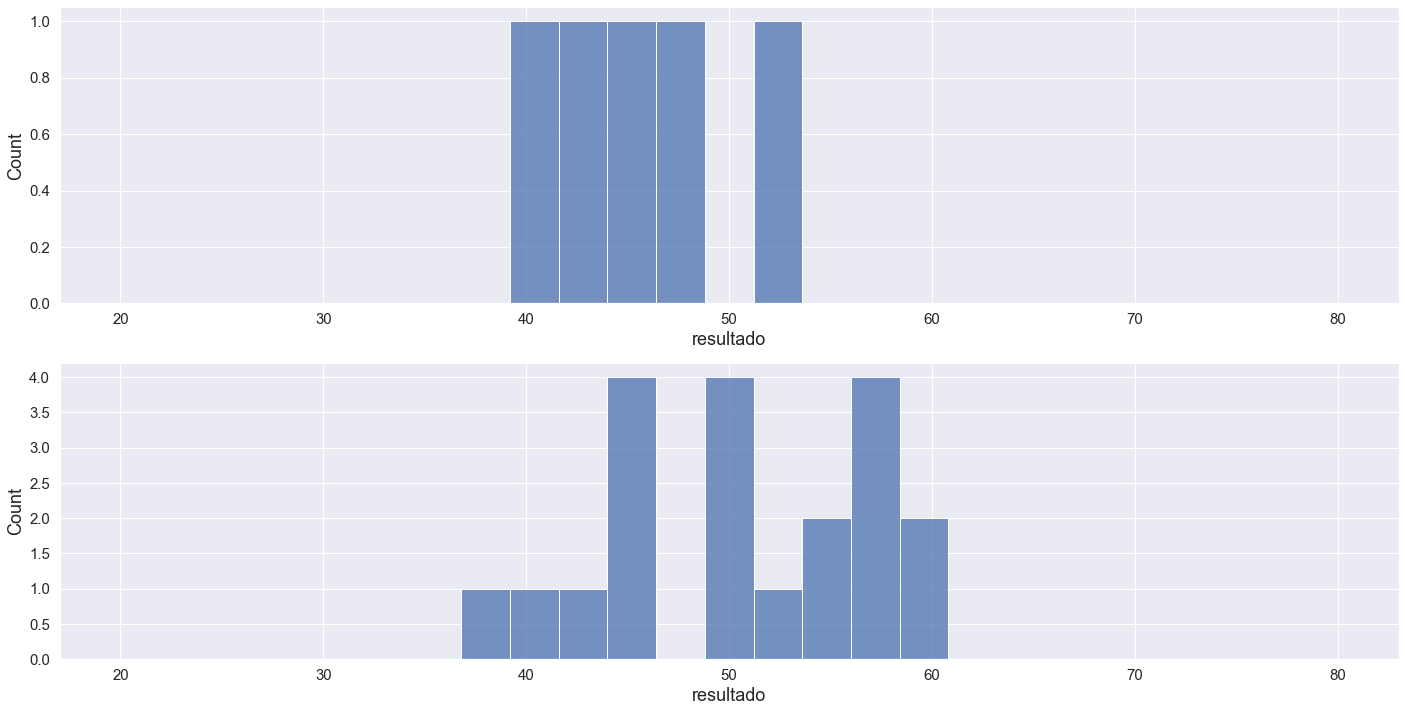

In [71]:
fig = plt.figure(figsize=(24,12))
specs = gridspec.GridSpec( nrows = 2, ncols = 1, figure = fig )
ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[1,0] )

sns.histplot(data = medias_amostras_1, x = 'resultado',bins = 25, binrange = (20,80), ax = ax1);
sns.histplot(data = medias_amostras_2, x = 'resultado',bins = 25, binrange = (20,80), ax = ax2);

<font color = red >**Aumentado a quantidade de amostras a tendência é:**</font>
* Concentrar mais valores entorno da média das médias
* Diminuir o desvio padrão das médias das médias
* **O relacionamento entre o erro-padrão e quantidade de amostras com mesmo tamanho:**
    * Quanto mais amostras menor será o desvio padrão **s** ( numerador da fórmula do Erro padrão) 
    * Menor será o Erro Padrão.

## 2.4 The Bootstrap

O <font color = blue>**Bootstrap**</font> é um procedimento eficaz de **estimar** a distribuição amostral de uma estatística ou de parâmetros de um modelo. 
* Não envolve necessariamente quaisquer suposições sobre os dados ou a estatística amostral sendo normalmente distribuída
* Um jeito fácil é extrair amostras adicionais, com reposição, da própria amostra, e recalcular a estatística ou modelo para cada reamostra.

### Termos Chaves

**Amostra bootstrap**
* Uma amostra extraída **com reposição** de um conjunto de dados observado. 

**Reamostragem**
* O processo de extrair **repetidas amostras** dos dados observados. 
* Inclui ambos os procedimentos:
    * Bootstrap
    * Permutação (embaralhamento)

### Ideia do Bootstrap

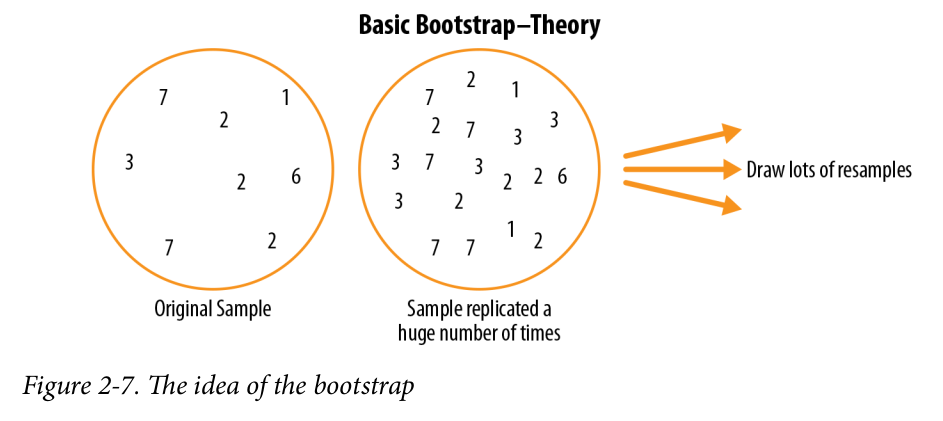

In [72]:
Image( "/home/deivison/Documentos/projetos/stats/imagem/cap_02_bootstrap_1.png")

<font color = red >**Conceitualmente, pode-se imaginar o bootstrap como a replicação da amostra original milhares ou milhões de vezes.**</font>
* De modo a ter uma **população hipotética** que representa todo o conhecimento da amostra original (só que maior). 
* Pode-se então **extrair novas amostras** dessa população hipotética a fim de **estimar uma distribuição amostral**.
* <font color = blue >**Na prática, não é necessário realmente replicar a amostra um número exorbitante de vezes.**</font>
    * Nós simplesmente substituímos cada observação depois de cada extração. 
    * Ou seja, amostramos com reposição. 
    * Dessa forma, criamos efetivamente uma **população infinita**
        * na qual a probabilidade de um elemento ser extraído continua a mesma de extração em extração.

### O algoritmo do Bootstrap

O algoritmo para uma reamostragem bootstrap da média é o seguinte, para **uma amostra de tamanho n**:
1. Extraia **um valor** de amostra, registre, reponha.
2. Repita n vezes.
3. Registre a média dos n valores reamostrados.
4. Repita os Passos de 1 a 3 R vezes.
5. Use os resultados <font color = red >**R**</font> para:
    * Calcular seu desvio-padrão ( isso estima o erro-padrão da média da amostra ).
    * Produza um histograma ou boxplot.
    * Encontre um intervalo de confiança.
    
<font color = red >**R**</font>, **o número de iterações do bootstrap, é ajustado de forma arbitrária.**

* Quanto mais iterações são feitas, mais precisa é a estimativa do erro-padrão ou o intervalo de confiança.
* O resultado desse procedimento é um conjunto bootstrap de estatísticas amostrais ou parâmetros de modelo estimados
    * Estatísticas amostrais / parâmetros podem ser então examinados a fim de encontrar o quão variáveis são.

### Exemplo Rendimentos Anuais de Candidatos a Empréstimo - Estatística Mediana

**Amostra loans_income com n = 50000**

In [73]:
# Tamanho da mostra
loans_income.shape

(50000,)

In [74]:
# mediana da amostra loans_income
loans_income.median()

62000.0

In [75]:
results = []
# 1. Extrair um valor registrar e reponha
    # 2. Reamostrar 1000 vezes e para cada reamostra calcular a mediana (valor)
for nrepeat in range(1000):
    sample = resample(loans_income)
    # 3. registre a mediana 
    results.append(sample.median())

# 4. Repetiu R = 1000 vezes 
    # Registrar 1000 medianas das reamostras --> 1000 reamostras, cada uma, com tamanho n = 50000
results = pd.Series(results)

# mediana da amostra original
print('Bootstrap Statistics:')
print(f'original: $ {loans_income.median()}')

# 5. Calcule a media das 1000 medianas 
print(f'media 1000 medianas: $ {results.mean() }')
      
# registrar a diferenca entre média das 1000 medianas com mediana da amostra original
print(f'vies: $ {results.mean() - loans_income.median()}')

#  Calcular desvio padrao das 1000 medianas --> equivalente ao Erro padrao amostral
print(f'erro padrao $: {results.std()}')

Bootstrap Statistics:
original: $ 62000.0
media 1000 medianas: $ 61923.0755
vies: $ -76.92450000000099
erro padrao $: 219.61904305825536


### Bootstrap Multivariado

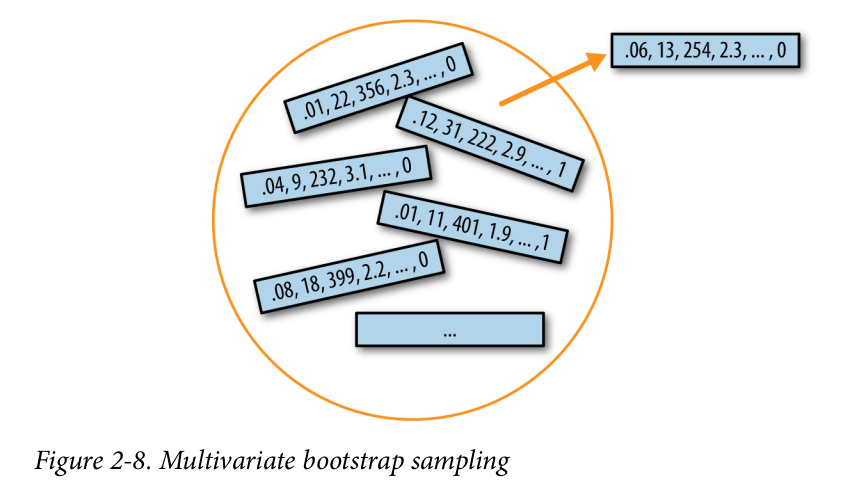

In [76]:
Image( "/home/deivison/Documentos/projetos/stats/imagem/cap_02_bootstrap_2.png")

O bootstrap pode ser usado com **dados multivariados**, em que as linhas são amostradas como unidades (veja a Figura 2-8). 

**Um modelo pode então ser aplicado em dados bootstrapped por exemplo para:**
* Estimar a estabilidade (variabilidade) de parâmetros de modelo
* Aumentar o poder preditivo.

Com árvores de classificação e regressão (também chamadas de árvores de decisão):

* Executar múltiplas árvores nas amostras bootstrap e então tirar a média de suas previsões

* Com classificação, fazendo uma votação da maioria, geralmente traz resultados melhores do que usar uma única árvore.

* <font color = blue >**Esse processo é chamado de bagging (abreviação de “bootstrap aggregating”)**</font>

A distribuição de amostragem da média tem sido bem estabelecida desde 1908, mas a distribuição de amostragem de muitas **outras métricas não**. 

**O bootstrap pode ser usado para:**
* determinação de tamanho de amostra; 
* experimentos com diferentes valores de n para ver como a distribuição de amostragem é afetada

<font color = red >**O bootstrap não compensa pequenos tamanhos de amostra.** </font> 
* Não cria novos dados 
* Nem preenche buracos em um conjunto de dados existente. 
* Meramente nos informa sobre como diversas amostras adicionais se comportariam ao serem extraídas de uma população como amostra original

### Reamostragem x Bootstrapping

O termo reamostragem:

* Às vezes é usado como **sinônimo** do termo bootstrapping

* <font color = blue >**Reamostragem também inclui procedimentos de permutação** </font>
    * Múltiplas amostras são combinadas
    * Amostragem pode ser feita sem reposição.

* <font color = red >**Bootstrap sempre significa amostragem com reposição de um conjunto de dados observado.** </font>

### Ideias Chaves

* O bootstrap (amostragem com reposição de um conjunto de dados) é uma ferramenta poderosa para **avaliar a variabilidade** de uma estatística amostral.

* O bootstrap pode ser **aplicado de forma similar em uma grande variedade de circunstâncias**, sem maiores estudos de aproximações matemáticas para distribuições de amostragem.

* Nos permite também **estimar distribuições** de amostragem para estatísticas em que nenhuma aproximação matemática foi desenvolvida.

* Quando aplicado a **modelos preditivos**, agregando múltiplas previsões de amostra, o bootstrap (bagging) supera o uso de um único modelo.

## 2.5 Intervalos de Confiança

Tabelas de frequência, histogramas, boxplots e erros-padrão são todos meios de entender o potencial erro de uma estimativa de amostra. 
**Intervalos de confiança são outro**

### Termos Chaves

**Nível de confiança**
* A porcentagem de intervalos de confiança, construída da mesma forma e de uma mesma população, em que se espera que haja a estatística de interesse.

**Extremidades de intervalo**
* O topo e a base do intervalo de confiança.

### Motivação

Analistas e gerentes, embora reconheçam a incerteza, depositam fé indevida em uma estimativa quando ela é apresentada como um único número (uma estimativa pontual).

* Apresentar uma estimativa não como um número único, mas como uma amplitude, é um modo de contrariar essa tendência. 

* **Os intervalos de confiança fazem isso de modo fundamentado em princípios de amostragem estatística.**

### Algoritmo do Intervalo de Confiança Bootstrap

Dada uma **amostra de tamanho n e uma estatística amostral** de interesse, o algoritmo para um intervalo de confiança do bootstrap é o seguinte:
1. Extrair uma amostra aleatória de tamanho n com reposição de dados (uma reamostragem).
2. Registrar as estatísticas de interesse para a reamostra.
3. Repetir os Passos 1 e 2 muitas (R) vezes.
4. Para um intervalo de confiança de x%, apare $ \frac{[ 100 - x]}{2} $ % dos resultados da reamostra R de cada ponta da distribuição.
5. Os pontos de apara são as extremidades de um intervalo de confiança de bootstrap de x%.

### Exemplo Rendimentos Anuais de Candidatos a Empréstimo - Intervalo de Confiança - Bootstrap

In [77]:
# tamanho da amostra original --> 50000 mil valores
loans_income.shape

(50000,)

In [78]:
# media da amostra original
loans_income.mean()

68760.51844

In [79]:
# Criar uma amostra com tamanho n = 20 da da amostra original
sample20 = resample(loans_income, n_samples=20, replace=False)
print('media amostra n = 20: {}'.format(sample20.mean() ) )

media amostra n = 20: 70908.0


In [80]:
#from scipy.stats import bootstrap
data = (sample20,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.95, random_state=42, n_resamples = 500 )
print(res.confidence_interval)
print('Erro padrao: {}'.format( res.standard_error ) )

ConfidenceInterval(low=59994.40487702875, high=86151.44657304318)
Erro padrao: 6487.236895742312


#### Outra abordagem

In [81]:
results = []
# 1. Extrair um valor registrar e reponha
    # Reamostrar 500 vezes a amostra tamanho 20 e para cada reamostra calcular a media (valor)
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())

# 2. Repetiu 500 vezes 
    # Registrar 500 medias das reamostras --> 500 reamostras, cada uma, com tamanho n = 20
results = pd.Series(results)
print('Media das 500 medias: {}'.format(results.mean() ) )
print('Erro padrao: {}'.format(results.std() ) )

Media das 500 medias: 71084.3757
Erro padrao: 7389.767716808918


In [82]:
ic = stats.norm.interval(alpha=0.95,loc=results.mean(),scale=(results.std() ) )
ic

(56600.69712093774, 85568.05427906227)

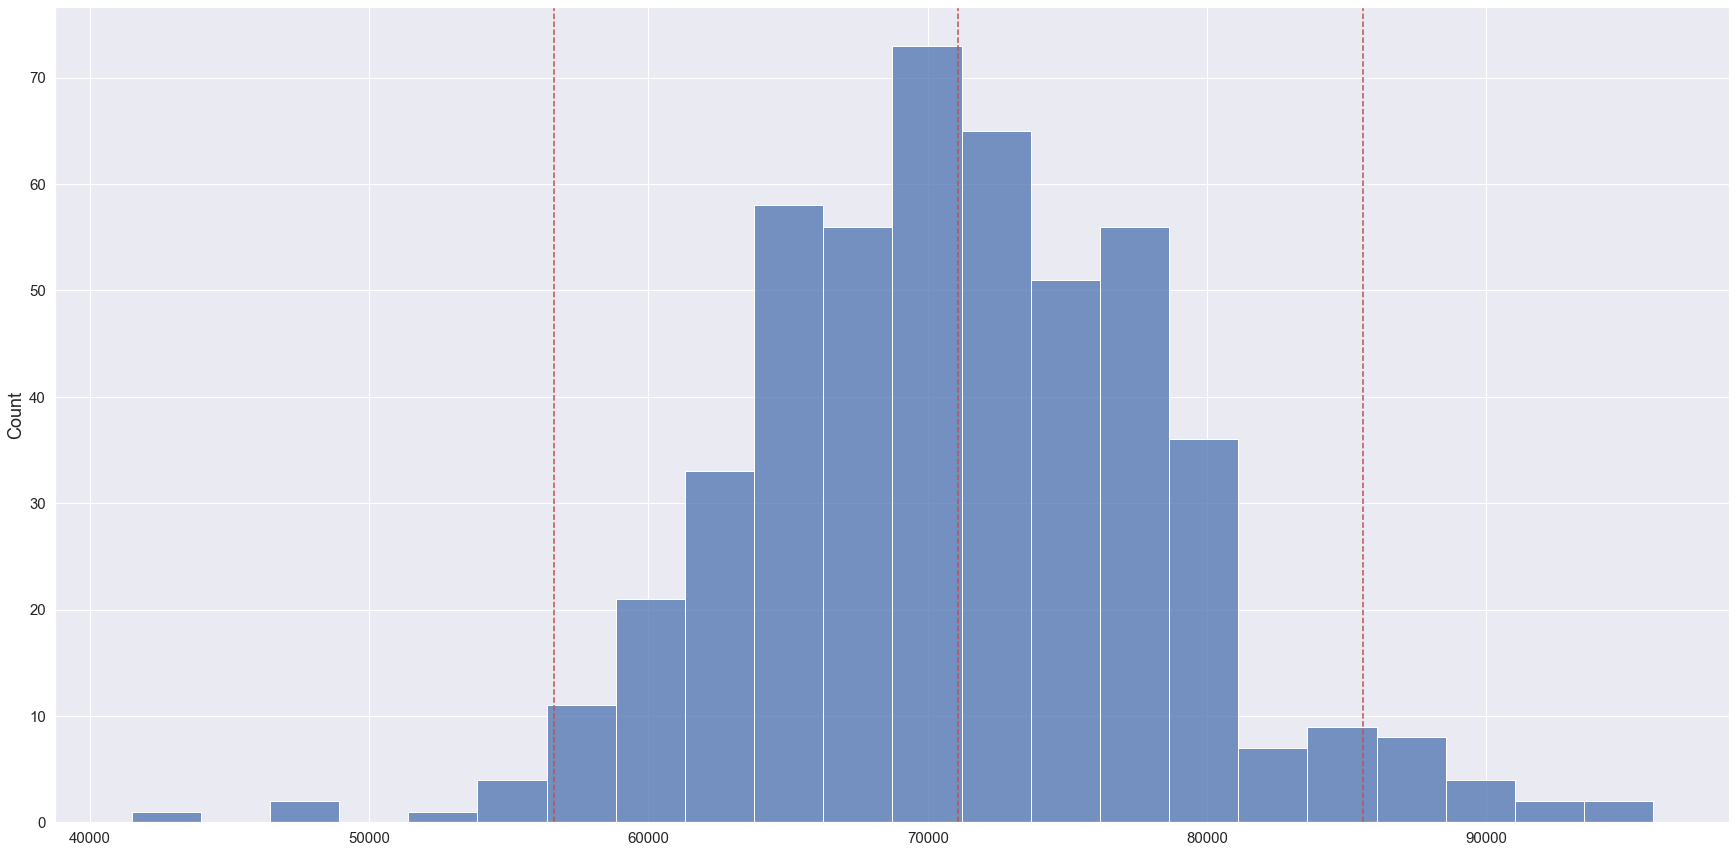

In [83]:
sns.histplot(data = results);
plt.axvline( x = results.mean(), color = 'r', linestyle = '--');
plt.axvline( x = ic[0], color = 'r', linestyle = '--');
plt.axvline( x = ic[1], color = 'r', linestyle = '--');

**É claro que o que realmente nos interessa ao obter um resultado de amostra é “qual é a probabilidade de o valor real estar dentro de um certo intervalo?”.** 

<font color = red>**Essa não é realmente a questão à qual um intervalo de confiança responde, mas acaba sendo o modo como a maioria das pessoas interpreta a resposta.**</font> 

A questão da probabilidade, associada a um intervalo de confiança, começa com a frase:

* **“Dado um procedimento de amostragem e uma população, qual é a probabilidade de…”** 

Para ir à direção contrária, 
* **“Dado um resultado de amostra, qual é a probabilidade de (algo ser real sobre a população)”**, envolve cálculos mais complexos e imponderáveis mais profundos.

A **porcentagem** associada ao intervalo de confiança é chamada de **nível de confiança**.
* Quanto maior o nível de confiança, maior o intervalo. 
* Quanto menor a amostra, maior o intervalo (ou seja, maior a incerteza). 
* Ambos fazem sentido: 
    * quanto mais confiante você quiser ser, e menos dados tiver, maior deve ser o intervalo de confiança para ser suficientemente garantida a captura do valor real.
* O bootstrap é um jeito eficaz de construir intervalos de confiança.
    
<font color = red>**Para um cientista de dados**</font>**, um intervalo de confiança é uma ferramenta para ter uma ideia de quão variável o resultado da amostra pode ser.** 

Os cientistas de dados não utilizariam essa informação para publicar um artigo acadêmico ou submeter um resultado a uma agência regulatória (como um pesquisador poderia fazer), **mas provavelmente para comunicar o potencial erro em uma estimativa e, talvez, entender se uma amostra maior é necessária.**

## 2.6 Distribuição Normal

### Termos chaves

**Erro**
* A diferença entre um ponto de dado e um valor médio ou previsto.

**Padronizar**
* Subtrair a média e dividir pelo desvio-padrão.

**Escore-z**
* O resultado da padronização de um ponto de dado individual.

**Normal padrão**
* Uma distribuição normal com média = 0 e desvio-padrão = 1.

**Gráfico QQ**
* Um gráfico para visualizar quão próxima uma distribuição amostral está de uma distribuição normal.

### A distribuição

A distribuição normal campanular é simbólica na estatística tradicional. 

O fato de as distribuições de estatísticas amostrais serem geralmente moldadas de forma normal as tornou uma ferramenta poderosa no desenvolvimento de fórmulas matemáticas que aproximam essas distribuições.

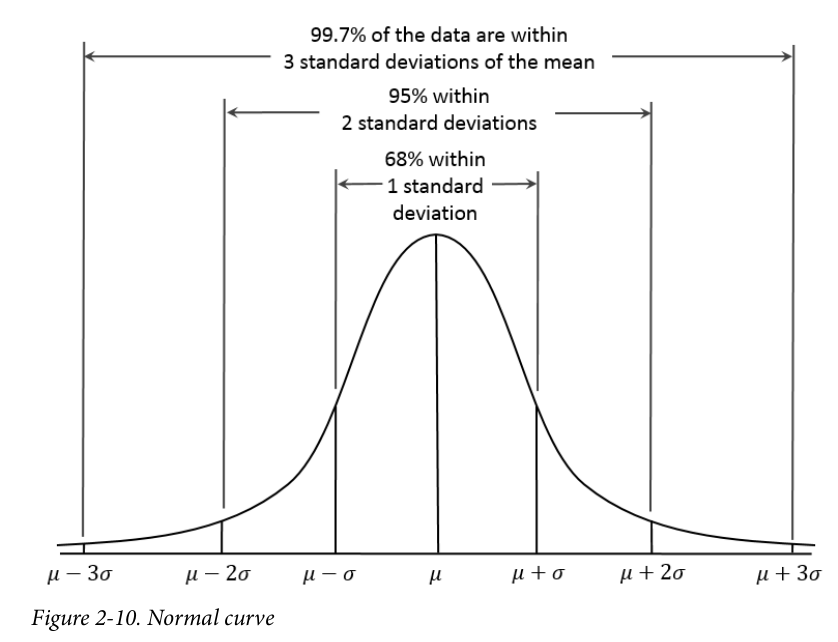

In [84]:
Image("/home/deivison/Documentos/projetos/stats/imagem/cap_02_normal_1.png")

Em uma distribuição normal (Figura 2-10), 68% dos dados ficam dentro de um desvio-padrão da média, e 95% ficam dentro de dois desvios-padrão

### Pontos de atenção

<font color = red>**Um erro comum é pensar que a distribuição normal tem esse nome porque a maior parte dos dados segue uma distribuição normal — ou seja, é a coisa normal.**<font> 

Muitas das variáveis usadas em um projeto de ciências de dados típico — na verdade, **a maioria dos dados brutos integralmente — não são normalmente distribuídas**.

A utilidade da distribuição normal vem do fato de **muitas estatísticas serem normalmente distribuídas em sua distribuição amostral**. 

Hipóteses de normalidade costumam ser o último recurso, usado quando distribuições empíricas de probabilidade, ou distribuições bootstrap, não estão disponíveis.

### Normal Padrão

Uma distribuição normal padrão é aquela na qual as unidades no eixo x **são expressas em termos de desvios-padrão da média.** 

<font color = blue>**Para comparar os dados a uma distribuição padrão normal deve-se subtrair a média e então dividir pelo desvio-padrão.**<font>

* Isso é chamado também de normalização ou padronização. 
* O valor transformado é chamado de escore z
* A distribuição normal às vezes é chamada de distribuição z.

### Gráficos QQ

Um gráfico QQ é usado para **determinar visualmente** quão próxima uma amostra está da distribuição normal. 

**O gráfico QQ ordena os escores z** de baixos a altos e registra cada valor do escore z no eixo y, e o eixo x é o quantil correspondente a uma distribuição normal para a posição daquele valor. 

Como os dados estão normalizados, as unidades correspondem a um número de desvios-padrão dos dados da média. 

**Se os pontos dificilmente caem na linha diagonal, então a distribuição amostral pode ser considerada perto de normal.**

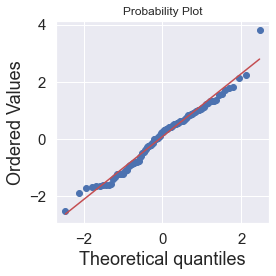

In [85]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

### Ideias Chaves

* A distribuição normal foi essencial para o desenvolvimento histórico da estatística, pois permitiu a aproximação matemática de incertezas e variabilidades. 

* <font color = red>**Enquanto os dados brutos não costumam ser normalmente distribuídos, os erros costumam ser, bem como as médias e totais em grandes amostras.**</font> 

* Para converter os dados em escores z, deve-se subtrair a média dos dados e dividir pelo desvio-padrão.

* Pode-se então comprar os dados com uma distribuição normal.

## 2.7 Distribuição de Cauda Longa

### Termos Chaves

**Cauda**
* A porção longa e estreita de uma distribuição de frequências, na qual valores relativamente extremos ocorrem em baixa frequência.

**Desequilíbrio**
* No qual uma cauda de uma distribuição é mais longa que outra.

### A distribuição

Enquanto a distribuição normal costuma ser apropriada e útil no que diz respeito à distribuição de erros e estatísticas amostrais, geralmente não caracteriza a distribuição de dados brutos. 

**Às vezes, a distribuição é altamente desequilibrada (assimétrica), como com dados de receita, ou a distribuição pode ser discreta, como com dados binomiais.** 

* Ambas as distribuições, simétrica e assimétrica, podem ter caudas longas. 
* As caudas de uma distribuição correspondem a **valores extremos (pequenos e grandes)**. 

As caudas longas, e a proteção contra elas, são altamente reconhecidas no trabalho prático. 

* Nassim Taleb propôs a teoria do cisne negro, que prevê que eventos anormais, como uma queda na bolsa de valores, estão mais propensos a acontecer do que o previsto pela distribuição normal.

**Um bom exemplo para ilustrar a natureza de cauda longa dos dados são os retornos de ações.**

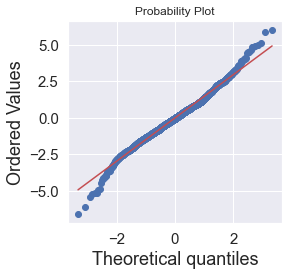

In [86]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

A Figura 2-12 mostra o gráfico QQ para os retornos diários de ações da Netflix (NFLX).

Os pontos estão muito abaixo da linha para valores baixos e muito acima da linha para valores altos. 
* Isso significa que estamos muito **mais propensos a observar valores extremos** do que seria esperado se os dados tivessem uma distribuição normal. 

A Figura 2-12 mostra outro fenômeno comum: 
* <font color = red>**Os pontos estão próximos da linha para os dados dentro de um desvio-padrão da média.**</font>
* Tukey (1987) se refere a esse fenômeno como os dados sendo **“normais no meio”**, mas tendo caudas muito mais longas.

### Ideias Chaves

* A maioria dos dados não é normalmente distribuída.
* Presumir uma distribuição normal pode levar à subestimação de eventos extremos (“cisnes negros”).

## 2.8 Distribuição Binomial

### Termos Chaves

**Ensaio**
* Um evento com um resultado discreto (por exemplo, jogar uma moeda).

**Sucesso**
* O resultado de interesse para um ensaio.
* Sinônimo
    * “1” (diferente de “0”)

**Binomial**
* Ter dois resultados.
* Sinônimos
    * sim/não, 0/1, binário

**Ensaio binomial**
* Um ensaio com dois resultados.
* Sinônimo ensaio Bernoulli

**Distribuição binomial**
* Distribuição do número de sucessos em x ensaios.
* Sinônimo distribuição Bernoulli

### A distribuição

**Resultados sim/não (binomiais) estão no centro da análise, já que costumam ser a culminação de uma decisão ou outro processo:** 
* Comprar/não comprar
* Clicar/não clicar
* Sobreviver/morrer
* Assim por diante. 

<font color = red>**Algo crucial para entender a distribuição binomial é a ideia de um conjunto de ensaios, cada um com dois resultados possíveis com probabilidades definidas.**</font>
* Tais resultados sim/não ou 0/1 são chamados de resultados binários e não precisam ter probabilidades 50/50.
* Quaisquer probabilidades que se resumem a 1,0 são possíveis. 

Em estatística, é comum chamar o resultado “1” de resultado sucesso, e é comum também a prática de atribuir “1” ao resultado mais raro. 

**O uso do termo sucesso não significa que o resultado seja desejável ou benéfico, mas tem a intenção de indicar o resultado de interesse.**

### Função de probabilidade

Se a variável aleatória X que contém o número de tentativas que resultam em sucesso tem uma distribuição binomial com parâmetros n e p escrevemos X ~ B(n, p). 

**A probabilidade de ter exatamente k sucessos é dado pela função de probabilidade:**


${\displaystyle f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}\,}$


${\displaystyle k=0,1,2,\dots ,n}$ e onde ${\displaystyle {n \choose k}}$ é uma combinação:

Colocando a função completa, incluindo a Combinação:

${\displaystyle f(k;n,p)={\frac {n!}{k!(n-k)!}}\ {p^{k}}{(1-p)^{n-k}}}$ 


**Cada parte da função acima traduz os seguintes dados:**

* A combinação ${\displaystyle {\frac {n!}{k!(n-k)!}}}$ contém as ordenações possíveis;

* O número de sucesso é ${\displaystyle {p^{k}}}$, e;

* A probabilidade de fracassos é ${\displaystyle (1-p)^{n-k}}$.

Por meio do desenvolvimento do binômio e algumas operações com expoentes e fatoriais, é possível demonstrar que:

${\displaystyle f(k;n,p)={\frac {p}{1-p}}{\frac {n-k+1}{k}}f(k-1;n,p)}$














### Ideias Chaves

A distribuição binomial é a distribuição de frequências do número de sucessos (x) em dado número de ensaios (n) com probabilidade especificada (p) de sucesso em cada ensaio. 

Existe uma família de distribuições binomiais, dependendo dos valores de x, n e p. 

A média de uma distribuição binomial é n × p. 

* Pode-se também pensar nisso como o número esperado de sucessos em n ensaios para probabilidade de sucesso = p

A variância é n × p(1 − p). 

**Com um número grande o bastante de ensaios (especialmente quando p está próximo de 0.50):**
* <font color = blue>**A distribuição binomial é virtualmente indistinguível da distribuição normal.**</font>
* Na verdade, calcular probabilidades binomiais com amostras de tamanho grande é **computacionalmente difícil**, com média e variância, como aproximação.

### Exemplo

Se a probabilidade de um clique se converter em uma venda é de 0,02, qual a probabilidade de se observar 0 vendas em 200 cliques?

Para o nosso exemplo, usamos x = 0, tamanho = 200 e p = 0,02.

In [87]:
print(stats.binom.pmf(0, n=200, p=0.02))

0.0175879466057215


## 2.9 Distribuição de Poisson

Dos dados a priori, podemos estimar o **número médio de eventos por unidade de tempo ou espaço**, mas podemos querer saber também quão diferente isso pode ser de uma unidade de tempo/espaço para outra. 

<font color = red>**A distribuição Poisson nos diz a distribuição dos eventos por unidade de tempo ou espaço quando tiramos muitas amostras de tal unidade.**</font>

É útil ao abordar questões de enfileiramento, como:
* “Qual é a capacidade necessária para ter 95% de certeza de processar totalmente o tráfego de internet que chega a um servidor em qualquer período de cinco segundos?”

O parâmetro-chave em uma distribuição Poisson é λ, ou lambda. 

* Esse é o número médio de eventos que ocorrem em um intervalo especificado de tempo ou espaço. 
* A variância para uma distribuição Poisson também é λ.

Uma técnica comum é gerar números aleatórios de uma distribuição como parte de uma simulação de enfileiramento. 

 A probabilidade de que existam exactamente k ocorrências (k sendo um **inteiro não negativo**, k = 0, 1, 2, ...) é:

${\displaystyle f(k;\lambda )={\frac {e^{-\lambda }\lambda ^{k}}{k!}},\,\!}$ 

* e = base do logaritmo natural (e = 2.71828...), 
* k! é o fatorial de k
* λ é um número real, igual ao número esperado de ocorrências que ocorrem num dado intervalo de tempo. 
    * Por exemplo, se o evento ocorre a uma média de 4 minutos, e estamos interessados no número de eventos que ocorrem num intervalo de 10 minutos, usaríamos como modelo a distribuição de Poisson com λ=10/4 = 2.5.
    
Como função de k, esta é a função de probabilidade.

A distribuição de Poisson pode ser derivada como um caso limite da distribuição binomial.

### Exemplo

In [88]:
sample = stats.poisson.rvs(2, size=100)
sample

array([3, 2, 2, 2, 1, 3, 1, 0, 3, 3, 1, 1, 2, 0, 1, 2, 3, 2, 2, 1, 3, 0,
       4, 4, 1, 2, 4, 4, 1, 5, 1, 3, 2, 4, 1, 1, 3, 2, 3, 2, 1, 0, 4, 1,
       1, 3, 1, 5, 0, 2, 2, 1, 2, 5, 3, 1, 4, 5, 2, 0, 0, 2, 0, 1, 1, 5,
       2, 2, 3, 4, 0, 3, 3, 4, 2, 2, 0, 3, 1, 2, 1, 0, 6, 4, 1, 1, 2, 0,
       0, 1, 1, 0, 4, 2, 2, 2, 1, 1, 6, 1])

**Esse código gerará 100 números aleatórios de uma distribuição Poisson com λ = 2.**

Por exemplo, se a média de recebimento de chamadas de SAC for de 2 por minuto

* Esse código simulará 100 minutos, retornando o número de chamadas a cada um desses 100 minutos.

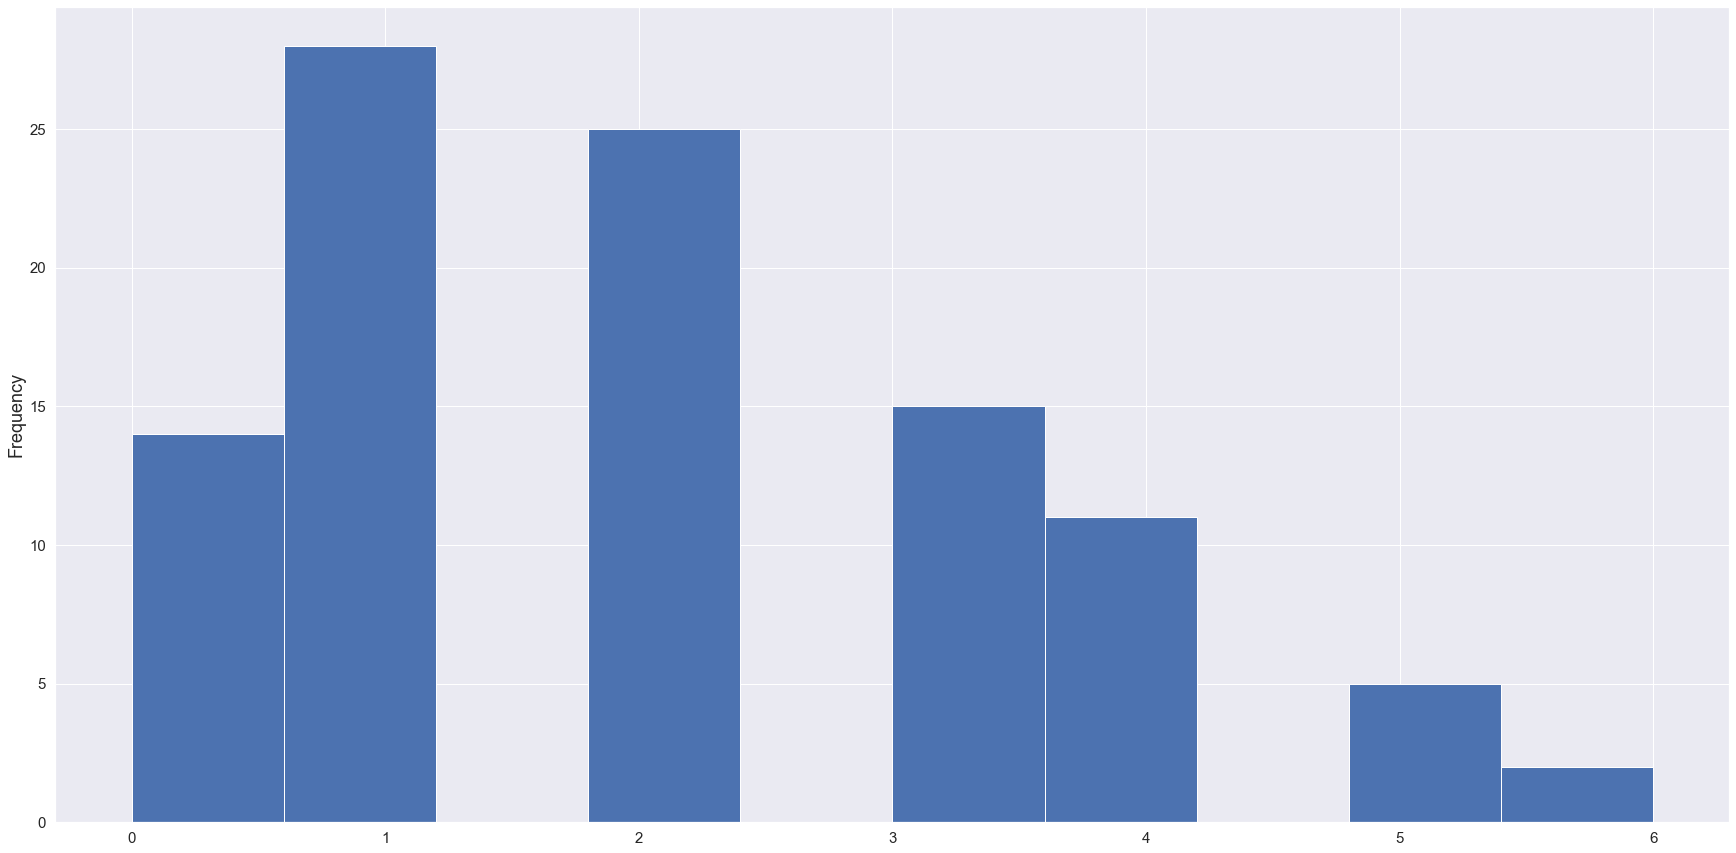

In [89]:
# histograma da distribuição de poisson

pd.Series(sample).plot.hist()
plt.show()

## 2.10 Distribuição Exponencial

Usando o mesmo parâmetro λ que usamos na distribuição Poisson, podemos também modelar a distribuição do tempo entre eventos: 
* Tempo entre as visitas a um site ou entre carros chegando a uma praça de pedágio. 
* É utilizado também em engenharia, para modelar tempo para a falha, e em gerenciamento de processos para modelar, por exemplo, o tempo necessário por chamada de serviço.

### Exemplo

Este código geraria 100 números aleatórios de uma distribuição exponencial onde o número médio de eventos por período de tempo é 0,2.

In [90]:
stats.expon.rvs(0.2, size=100)

array([1.37731189, 1.84573687, 0.75297381, 1.36761607, 0.42040142,
       0.98286083, 0.63209508, 0.93918639, 1.90364674, 1.29615106,
       0.88418106, 0.64295183, 5.10006383, 0.31494546, 3.47558601,
       0.50413847, 1.57669395, 2.43169061, 0.58990573, 0.21137616,
       1.04272363, 0.74631565, 4.61435692, 1.12232438, 3.02165203,
       2.01386038, 2.04304224, 0.26317405, 0.74499881, 0.51591673,
       0.84563406, 1.06660564, 0.36525587, 0.25600557, 0.9340941 ,
       1.81336471, 2.83474513, 0.39733682, 0.6323552 , 0.42943915,
       0.73124144, 0.39148827, 0.40854785, 1.24552559, 2.08876524,
       0.22336303, 0.74053589, 0.42137628, 0.83324705, 0.57153527,
       2.46778989, 0.8375334 , 1.19271453, 0.41384013, 0.40214713,
       0.85860364, 0.32551367, 0.22852432, 1.17704265, 0.83165382,
       0.89366008, 3.57231347, 1.54972173, 1.83663402, 1.95195599,
       0.81629737, 1.4890587 , 5.65774093, 0.40326393, 0.62111614,
       0.37926691, 6.7998229 , 3.27570914, 0.75437154, 0.22116

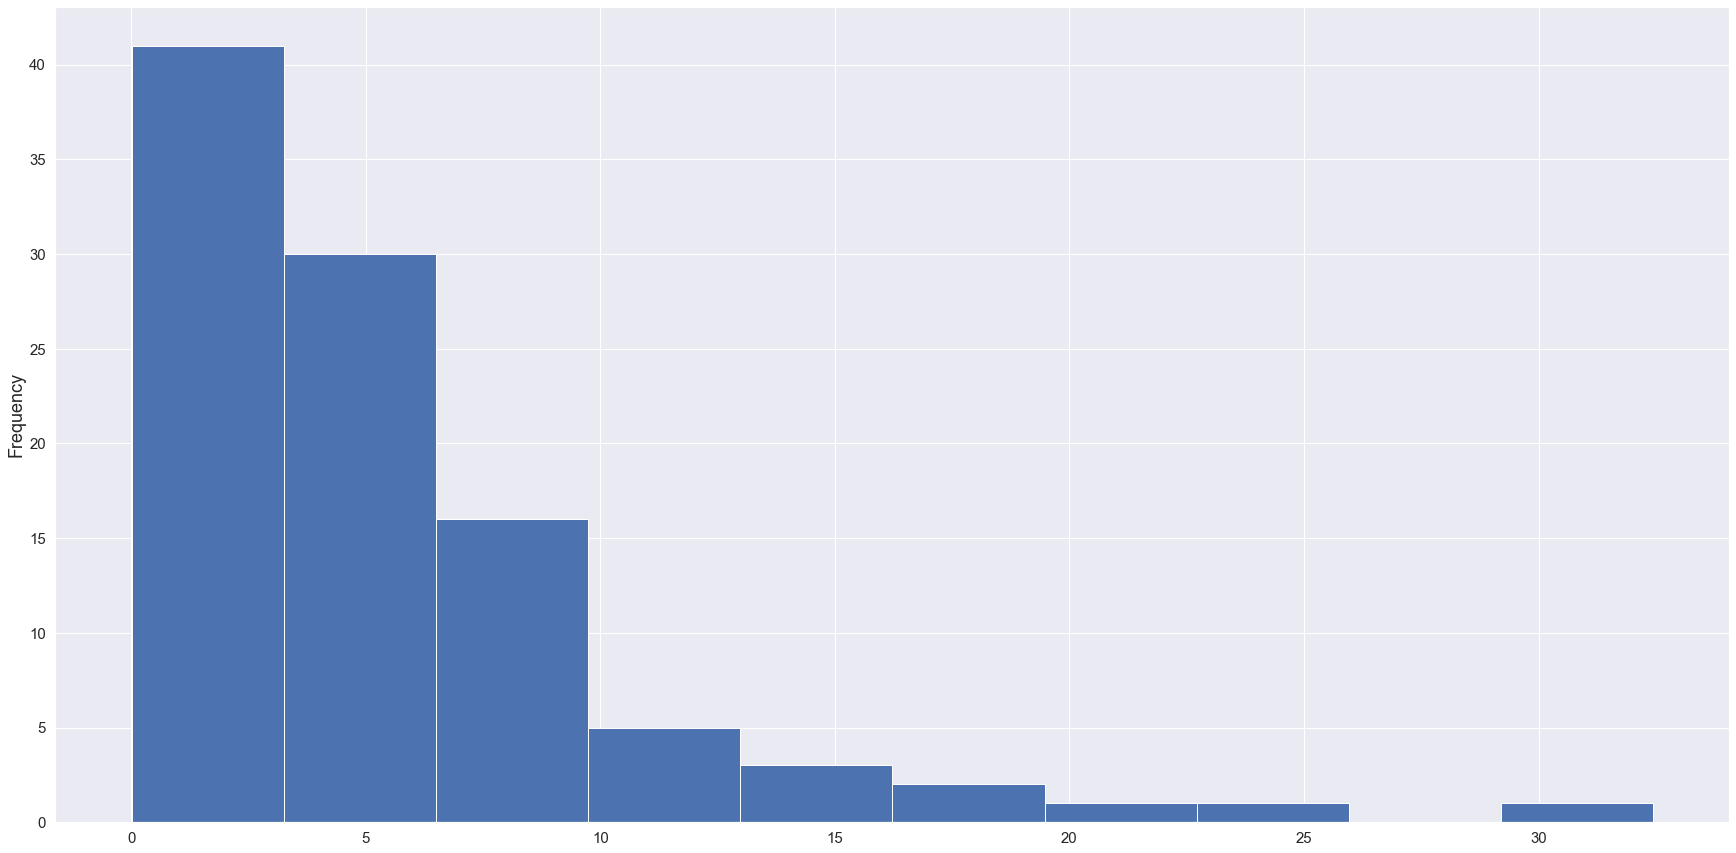

In [91]:
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

## Estimativas de Taxas de Falhas

<font color = red>**Uma suposição chave em qualquer estudo de simulação para a distribuição de Poisson ou exponencial é que a taxa, λ , permanece constante durante o período considerado.**</font>

**Isso raramente é razoável em um sentido global;**

* Por exemplo, o tráfego em estradas ou redes de dados varia de acordo com a hora do dia e o dia da semana.
* No entanto, os períodos de tempo, ou áreas do espaço, geralmente podem ser divididos em segmentos suficientemente homogêneos para que a análise ou simulação dentro desses períodos seja válida.

Em muitas aplicações, a taxa de eventos, λ, é conhecida ou pode ser estimada a partir de dados anteriores.

No entanto, para **eventos raros**, isso não é necessariamente assim. 

* A falha do motor da aeronave, por exemplo, é tão rara (felizmente) que, para um determinado tipo de motor, pode haver poucos dados para basear uma estimativa de tempo entre falhas. 

* Sem nenhum dado, há pouca base para estimar uma taxa de eventos. 

**No entanto, você pode fazer algumas suposições:**
* Se nenhum evento foi visto após 20 horas, você pode ter certeza de que a taxa não é de 1 por hora. 
* Por meio de simulação ou cálculo direto de probabilidades, você pode avaliar diferentes taxas de eventos hipotéticos e estimar valores de limite abaixo dos quais é muito improvável que a taxa caia. 
* Se houver alguns dados, mas não o suficiente para fornecer uma estimativa precisa e confiável da taxa, um teste de qualidade de ajuste pode ser aplicado a várias taxas para determinar quão bem elas se ajustam os dados observados.

##  2.11 Distribuição Weibull

**Em muitos casos, a taxa de evento não permanece constante ao longo do tempo.**

Se o período através do qual a taxa muda for muito mais longo do que o intervalo típico entre os eventos, não tem problema; 
* Basta subdividir a análise nos segmentos em que a taxa é relativamente constante

* Se, no entanto, a taxa de evento muda ao longo do tempo do intervalo, as distribuições exponenciais / Poisson não são mais úteis.

* Esse costuma ser o caso de falhas mecânicas — o risco de falha aumenta com o passar do tempo. 

A distribuição Weibull é uma extensão da distribuição exponencial, na qual a taxa de evento pode mudar, conforme especificado por um parâmetro de forma, β.
* Se β > 1, a probabilidade de um evento aumenta com o tempo 
* Se β < 1, a probabilidade de um evento diminui com o tempo 

**Como a distribuição Weibull é utilizada com análises de tempo até a falha**, em vez da taxa de evento, o segundo parâmetro é expressado em termos de vida característica, em vez dos termos de taxa de evento por intervalo. 

O símbolo usado é η, a letra grega eta. 
* É chamado também de parâmetro de escala. 

Com a Weibull, a tarefa de estimação inclui agora a estimação dos dois parâmetros, β e η. 

O software é usado para modelar os dados e produzir uma estimativa da distribuição Weibull mais adequada.

### Função de Distribuição

A função distribuição acumulada da distribuição de Weibull é:

${\displaystyle F(x;k,\lambda )=1-e^{-(x/\lambda )^{k}}\,}$

para x ≥ 0, e F(x; k; λ) = 0 para x < 0.

O quantil da distribuição de Weibull é

${\displaystyle Q(p;k,\lambda )=\lambda {(-ln(1-p))}^{1/k}}$

para 0 ≤ p < 1.

A função hazard h (taxa de falhas) é dada por:

${\displaystyle h(x;k,\lambda )={k \over \lambda }\left({x \over \lambda }\right)^{k-1}.}$

No contexto em que x é interpretado como o "tempo transcorrido até falha" a distribuição de Weibull fornece a distribuição de probabilidades de um dispositivo ou material falhar em um dado intervalo de tempo.

Como pode ser visto na definição da função hazard h, existe uma dependência exponencial com o parâmetro k o que determina 3 comportamentos bem diferentes para:

* **k<1:** alta taxa de falha no início. 
    * Esse é um comportamento típico de processos industriais em que a maioria das falhas ocorre no processo de produção dos items ou quando a taxa de falha diminui com a eliminação da população defeituosa de dispositivos.
* **k=1:** chance de falha independente do tempo e comportamento exponencialmente decrescente da distribuição. 
    * Processos "sem memória" em que as falhas ocorrem devido a razões aleatórias.
* **k>1:** chance de falha crescente com o tempo.
    * Casos em que há um processo de envelhecimento.

### Exemplo

O código a seguir gera 100 números aleatórios (vida útil) de uma distribuição Weibull com forma de 1,5 e vida característica de 5.000

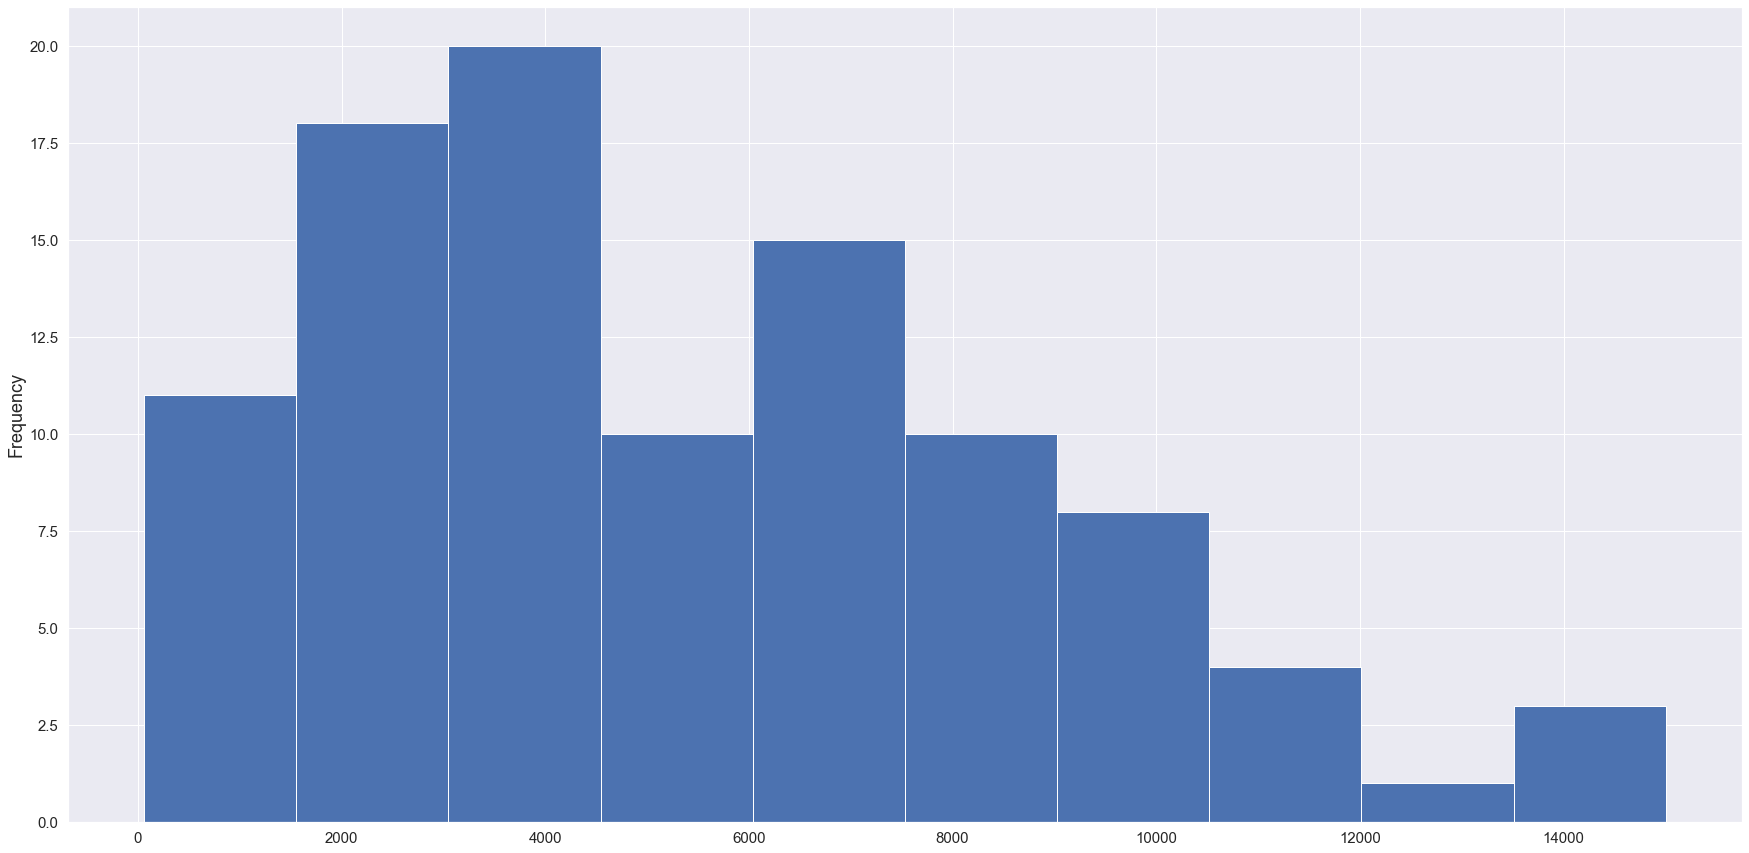

In [92]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()

## 2.12 Distribuição t-student

A distribuição t é uma distribuição de formato normal, exceto que é um pouco mais espessa e mais longa nas caudas. 

**É usado extensivamente na representação de distribuições de estatísticas de amostra.**

As distribuições de médias amostrais são tipicamente moldadas como uma distribuição t, e <font color = blue>**há uma família de distribuições t que diferem dependendo do tamanho da amostra.**</font>

Quanto maior a amostra, mais normal se torna a distribuição t.

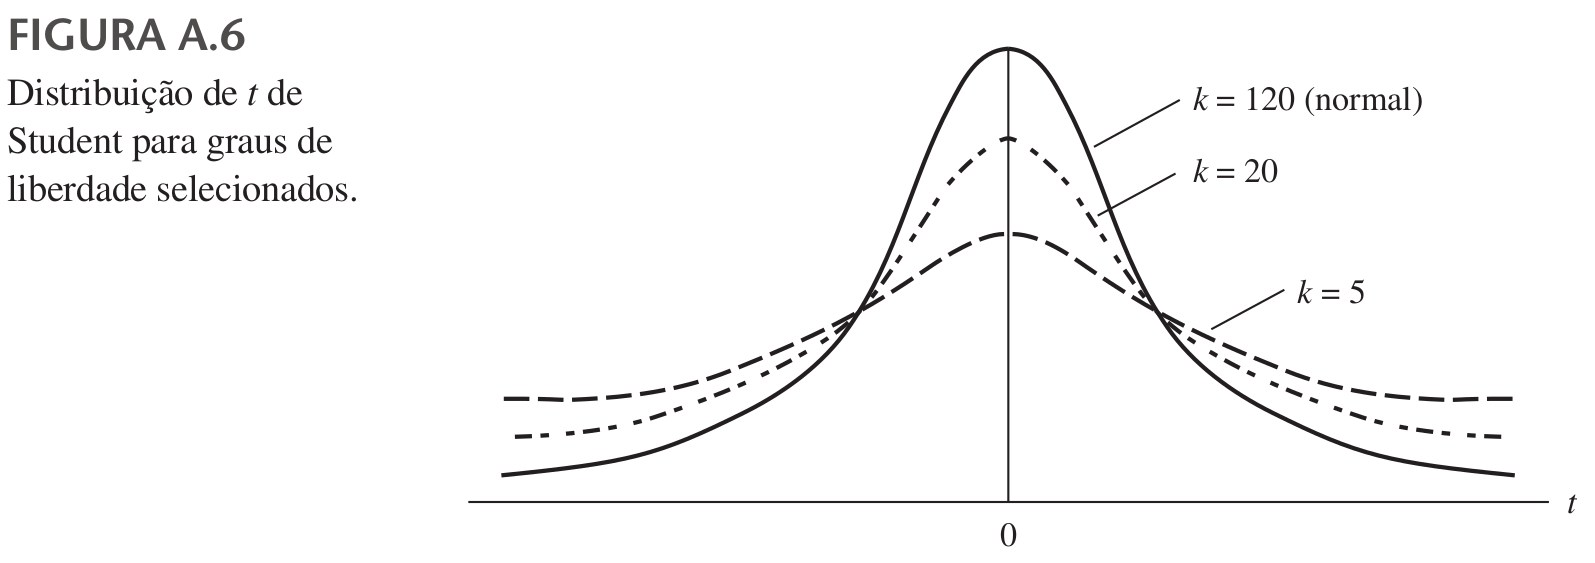

In [93]:
Image( '/home/deivison/Documentos/projetos/stats/imagem/cap_02_dist_t_student_gl.png')


### Termos Chaves

**n**
* Tamanho da amostra.

**Graus de liberdade**
* Um parâmetro que permite que a distribuição t se ajuste a diferentes tamanhos de amostra,
estatísticas e número de grupos.

### A distribuição

A distribuição t é frequentemente chamada de t de Student porque foi publicada em 1908 na Biometrika por W. S. Gosset sob o nome de “Student”.

O empregador de Gosset, a cervejaria Guinness, não queria que os concorrentes soubessem que estava usando métodos estatísticos, então insistiu que Gosset não usasse seu nome no artigo. 

Gosset queria responder à pergunta **“Qual é a distribuição amostral da média de uma amostra, extraída de uma população maior?”** 

Ele começou com um experimento de reamostragem – tirando amostras aleatórias de 4 de um conjunto de dados de 3.000 medidas de altura e comprimento do dedo médio esquerdo dos criminosos. 

* Esta sendo a era da eugenia, havia muito interesse em dados sobre criminosos e em descobrir correlações entre tendências criminosas e atributos físicos ou psicológicos. 

* Gosset traçou os resultados padronizados (os escores z) no eixo x e a frequência no eixo y.
* Separadamente, ele derivou uma função, agora conhecida como t de Student, e ele ajustou essa função sobre os resultados da amostra, traçando a comparação.

**Diversas estatísticas diferentes podem ser comparadas, depois da padronização, à distribuição t, para estimar os intervalos de confiança à luz da variação amostral.**

A distribuição t tem sido usada como **referência** para:
* Distribuição de uma média amostral
* Diferença entre duas médias amostrais
* Parâmetros de regressão e ouras estatísticas

A precisão da distribuição t na representação do comportamento de uma estatística amostral exige que a distribuição de tal estatística para tal amostra seja formatada como uma distribuição normal. 

<font color = red>**As estatísticas amostrais costumam ser normalmente distribuídas, mesmo quando os dados populacionais subjacentes não o sejam.**</font>

* Esse fenômeno é chamado de teorema de limite central (um fato que levou à vasta aplicação da distribuição t).

<font color = blue>**O que os cientistas de dados precisam saber sobre a distribuição t e o teorema de limite central?**</font> 

* Não muito. 

* Essas distribuições são usadas em inferências estatísticas clássicas, mas não são tão centrais ao propósito da ciência de dados.

* O entendimento e a quantificação de incertezas e variações são importantes para os cientistas de dados, mas a amostragem empírica bootstrap pode responder à maioria das perguntas sobre erros de amostragem. 

<font color = red>**No entanto, os cientistas de dados encontrarão com frequência estatísticas t em resultados de softwares estatísticos e procedimentos estatísticos:**</font>
* **em testes A-B**
* **em regressões, então a familiaridade com seu propósito é útil.**

## 2.13 Distribuição Chi²

Uma ideia importante em estatística é o **afastamento da expectativa**, especialmente no que diz respeito à contagem de categorias. 

A expectativa é definida livremente como “nada incomum ou digno de nota nos dados” 
* por exemplo, nenhuma correlação entre variáveis ou padrões previsíveis
* Isso também é chamado de “hipótese nula” ou “modelo nulo”

Por exemplo, você pode querer testar se uma variável (digamos, uma variável de linha representando sexo) é independente de outra (digamos, uma variável de coluna representando “foi promovido no emprego”) e você tem contagens do número em cada uma das células de dados.
 
**A estatística que mede até que ponto os resultados se afastam da expectativa nula de independência é a estatística qui-quadrado.**

É a diferença entre os valores observados e esperados, dividida pela raiz quadrada do valor esperado, elevada ao quadrado e somada em todas as categorias.

**Este processo padroniza a estatística para que possa ser comparada a uma distribuição de referência.**

Uma maneira mais geral de colocar isso é observar que a estatística qui-quadrado é uma medida da extensão em que um conjunto de valores observados “se ajusta” a uma distribuição especificada (um teste de “qualidade de ajuste”). 

* É útil para determinar se vários tratamentos (um “teste A/B/C…”) diferem uns dos outros em seus efeitos.

A distribuição do qui-quadrado é a distribuição dessa estatística sob repetidos sorteios reamostrados do modelo nulo.

* Um valor baixo de qui-quadrado para um conjunto de contagens indica que elas seguem de perto a distribuição esperada. 
* Um qui-quadrado alto indica que eles diferem marcadamente do esperado.

Há uma variedade de distribuições qui-quadrado associadas a diferentes graus de liberdade.

### Distribuição de probabilidade

**A probabilidade da distribuição qui quadrado não é simétrica como a da distribuição normal.**

Dessa forma, para aumentar seu estado de simetria, é necessário aumentar o seu grau de liberdade.
* Portanto a relação entre simetria e grau de liberdade é diretamente proporcional.

A variável ${\displaystyle \chi _{k}^{2}}$ , por si só, apresenta uma função densidade de probabilidade. 

Esta função apresenta qual a probabilidade de a variável ${\displaystyle \chi _{k}^{2}}$ assumir um valor entre ${\displaystyle \chi _{k}^{2}}$ e ${\displaystyle \chi _{k}^{2}+d\chi _{k}^{2}}$, e é dada por:

${\displaystyle f(\chi _{k}^{2})={\frac {1}{2^{k/2}\Gamma (k/2)}}(\chi _{k}^{2})^{k/2-1}e^{-\chi _{k}^{2}/2}.}$ 

É interessante analisar que a média da distribuição χ2 é k. 

* Isto é se repetirmos o teste de χ2 muitas vezes (para várias medidas coletadas diferentes), esperamos que a média dos valores de χ2 encontrados tenda para o número de graus de liberdade estatísticos.

A distribuição qui-quadrado pode ser simulada a partir da distribuição normal. 

* Por definição, se ${Z_{1},Z_{2}}$,$\ldots Z_{k}$ , forem k distribuições normais padronizadas (ou seja, média 0 e desvio padrão 1) independentes, então a soma de seus quadrados é uma distribuição qui-quadrado com k graus de liberdade:

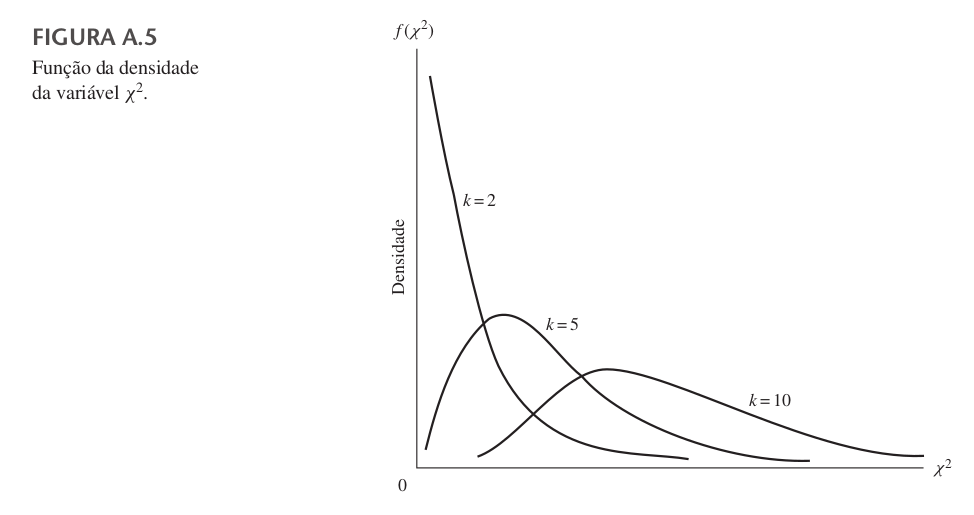

In [94]:
Image( '/home/deivison/Documentos/projetos/stats/imagem/cap_02_dist_chi_1.png')

## 2.14 Distribuição F

Um procedimento comum na experimentação científica é testar vários tratamentos entre grupos. – digamos, diferentes fertilizantes em diferentes blocos de um campo.

Isso é semelhante ao teste A/B/C referido na distribuição do qui-quadrado, exceto que estamos lidando com valores contínuos medidos em vez de contagens. 

Nesse caso, estamos interessados em saber até que ponto as diferenças entre as médias dos grupos são maiores do que poderíamos esperar sob a variação aleatória normal.

**A estatística F mede isso e é a razão entre a variabilidade entre as médias do grupo e a variabilidade dentro de cada grupo (também chamada de variabilidade residual).**
* Essa comparação é denominada análise de variância

A distribuição da estatística F é a distribuição de frequência de todos os valores que seriam produzidos pela permutação aleatória de dados em que todas as médias dos grupos são iguais (ou seja, um modelo nulo).

Há uma variedade de distribuições F associadas a diferentes graus de liberdade.

A estatística F também é usada na regressão linear para comparar a variação contabilizada pelo modelo de regressão com a variação geral dos dados. 

As estatísticas F são produzidas automaticamente por R e Python como parte das rotinas de regressão e ANOVA.